# **Project Name - Airbnb Bookings Analysis**

### **Importing the necessary libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt     #for visualization
%matplotlib inline
import seaborn as sns               #for visualization
import warnings
warnings.filterwarnings('ignore')

### **Load Airbnb Dataset**

In [ ]:
Airbnb_df = pd.read_csv('Airbnb NYC 2019.csv')
Airbnb_df

id                                               name   host_id  \
0          2539                 Clean & quiet apt home by the park      2787   
1          2595                              Skylit Midtown Castle      2845   
2          3647                THE VILLAGE OF HARLEM....NEW YORK !      4632   
3          3831                    Cozy Entire Floor of Brownstone      4869   
4          5022   Entire Apt: Spacious Studio/Loft by central park      7192   
...         ...                                                ...       ...   
48890  36484665    Charming one bedroom - newly renovated rowhouse   8232441   
48891  36485057      Affordable room in Bushwick/East Williamsburg   6570630   
48892  36485431            Sunny Studio at Historical Neighborhood  23492952   
48893  36485609               43rd St. Time Square-cozy single bed  30985759   
48894  36487245  Trendy duplex in the very heart of Hell's Kitchen  68119814   

           host_name neighbourhood_group       neighbourhood  latitude  \
0               John            Brooklyn          Kensington  40.64749   
1           Jennifer           Manhattan             Midtown  40.75362   
2          Elisabeth           Manhattan              Harlem  40.80902   
3        LisaRoxanne            Brooklyn        Clinton Hill  40.68514   
4              Laura           Manhattan         East Harlem  40.79851   
...              ...                 ...                 ...       ...   
48890        Sabrina            Brooklyn  Bedford-Stuyvesant  40.67853   
48891        Marisol            Brooklyn            Bushwick  40.70184   
48892  Ilgar & Aysel           Manhattan              Harlem  40.81475   
48893            Taz           Manhattan      Hell's Kitchen  40.75751   
48894     Christophe           Manhattan      Hell's Kitchen  40.76404   

       longitude        room_type  price  minimum_nights  number_of_reviews  \
0      -73.97237     Private room    149               1                  9   
1      -73.98377  Entire home/apt    225               1                 45   
2      -73.94190     Private room    150               3                  0   
3      -73.95976  Entire home/apt     89               1                270   
4      -73.94399  Entire home/apt     80              10                  9   
...          ...              ...    ...             ...                ...   
48890  -73.94995     Private room     70               2                  0   
48891  -73.93317     Private room     40               4                  0   
48892  -73.94867  Entire home/apt    115              10                  0   
48893  -73.99112      Shared room     55               1                  0   
48894  -73.98933     Private room     90               7                  0   

      last_review  reviews_per_month  calculated_host_listings_count  \
0      2018-10-19               0.21                               6   
1      2019-05-21               0.38                               2   
2             NaN                NaN                               1   
3      2019-07-05               4.64                               1   
4      2018-11-19               0.10                               1   
...           ...                ...                             ...   
48890         NaN                NaN                               2   
48891         NaN                NaN                               2   
48892         NaN                NaN                               1   
48893         NaN                NaN                               6   
48894         NaN                NaN                               1   

       availability_365  
0                   365  
1                   355  
2                   365  
3                   194  
4                     0  
...                 ...  
48890                 9  
48891                36  
48892                27  
48893                 2  
48894                23  

[48895 rows x 16 columns]

# **Data Exploration and Data Cleaning**

In [ ]:
Airbnb_df.head().T

0  \
id                                                            2539   
name                            Clean & quiet apt home by the park   
host_id                                                       2787   
host_name                                                     John   
neighbourhood_group                                       Brooklyn   
neighbourhood                                           Kensington   
latitude                                                  40.64749   
longitude                                                -73.97237   
room_type                                             Private room   
price                                                          149   
minimum_nights                                                   1   
number_of_reviews                                                9   
last_review                                             2018-10-19   
reviews_per_month                                             0.21   
calculated_host_listings_count                                   6   
availability_365                                               365   

                                                    1  \
id                                               2595   
name                            Skylit Midtown Castle   
host_id                                          2845   
host_name                                    Jennifer   
neighbourhood_group                         Manhattan   
neighbourhood                                 Midtown   
latitude                                     40.75362   
longitude                                   -73.98377   
room_type                             Entire home/apt   
price                                             225   
minimum_nights                                      1   
number_of_reviews                                  45   
last_review                                2019-05-21   
reviews_per_month                                0.38   
calculated_host_listings_count                      2   
availability_365                                  355   

                                                                  2  \
id                                                             3647   
name                            THE VILLAGE OF HARLEM....NEW YORK !   
host_id                                                        4632   
host_name                                                 Elisabeth   
neighbourhood_group                                       Manhattan   
neighbourhood                                                Harlem   
latitude                                                   40.80902   
longitude                                                  -73.9419   
room_type                                              Private room   
price                                                           150   
minimum_nights                                                    3   
number_of_reviews                                                 0   
last_review                                                     NaN   
reviews_per_month                                               NaN   
calculated_host_listings_count                                    1   
availability_365                                                365   

                                                              3  \
id                                                         3831   
name                            Cozy Entire Floor of Brownstone   
host_id                                                    4869   
host_name                                           LisaRoxanne   
neighbourhood_group                                    Brooklyn   
neighbourhood                                      Clinton Hill   
latitude                                               40.68514   
longitude                                             -73.95976   
room_type                                       Entire home/apt   
price                     

In [ ]:
#checking what are the variables here:
Airbnb_df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')



---


*   **so now first rename few columns for better understanding of variables -**

In [ ]:
rename_col = {'id':'listing_id','name':'listing_name','number_of_reviews':'total_reviews','calculated_host_listings_count':'host_listings_count'}

In [ ]:
# use a pandas function to rename the current function
Airbnb_df = Airbnb_df.rename(columns = rename_col)
Airbnb_df.head(2)

listing_id                        listing_name  host_id host_name  \
0        2539  Clean & quiet apt home by the park     2787      John   
1        2595               Skylit Midtown Castle     2845  Jennifer   

  neighbourhood_group neighbourhood  latitude  longitude        room_type  \
0            Brooklyn    Kensington  40.64749  -73.97237     Private room   
1           Manhattan       Midtown  40.75362  -73.98377  Entire home/apt   

   price  minimum_nights  total_reviews last_review  reviews_per_month  \
0    149               1              9  2018-10-19               0.21   
1    225               1             45  2019-05-21               0.38   

   host_listings_count  availability_365  
0                    6               365  
1                    2               355

In [ ]:
#checking shape of Airbnb dataset
Airbnb_df.shape

(48895, 16)

In [ ]:
#basic information about the dataset
Airbnb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   listing_id           48895 non-null  int64  
 1   listing_name         48879 non-null  object 
 2   host_id              48895 non-null  int64  
 3   host_name            48874 non-null  object 
 4   neighbourhood_group  48895 non-null  object 
 5   neighbourhood        48895 non-null  object 
 6   latitude             48895 non-null  float64
 7   longitude            48895 non-null  float64
 8   room_type            48895 non-null  object 
 9   price                48895 non-null  int64  
 10  minimum_nights       48895 non-null  int64  
 11  total_reviews        48895 non-null  int64  
 12  last_review          38843 non-null  object 
 13  reviews_per_month    38843 non-null  float64
 14  host_listings_count  48895 non-null  int64  
 15  availability_365     48895 non-null 

In [ ]:
# check duplicate rows in dataset
Airbnb_df = Airbnb_df.drop_duplicates()
Airbnb_df.count()

listing_id             48895
listing_name           48879
host_id                48895
host_name              48874
neighbourhood_group    48895
neighbourhood          48895
latitude               48895
longitude              48895
room_type              48895
price                  48895
minimum_nights         48895
total_reviews          48895
last_review            38843
reviews_per_month      38843
host_listings_count    48895
availability_365       48895
dtype: int64

**so, there is no any duplicate rows in Dataset**

---

In [ ]:
# checking null values of each columns
Airbnb_df.isnull().sum()

listing_id                 0
listing_name              16
host_id                    0
host_name                 21
neighbourhood_group        0
neighbourhood              0
latitude                   0
longitude                  0
room_type                  0
price                      0
minimum_nights             0
total_reviews              0
last_review            10052
reviews_per_month      10052
host_listings_count        0
availability_365           0
dtype: int64


**host_name** and **listing_name** are not that much of null values, so first  we are good to fill those with some substitutes in both the columns first.




In [ ]:
Airbnb_df['listing_name'].fillna('unknown',inplace=True)
Airbnb_df['host_name'].fillna('no_name',inplace=True)

In [ ]:
#so the null values are removed
Airbnb_df[['host_name','listing_name']].isnull().sum()

host_name       0
listing_name    0
dtype: int64

In [ ]:
Airbnb_df = Airbnb_df.drop(['last_review'], axis=1)     #removing last_review column beacause of not that much important

In [ ]:
Airbnb_df.info()      # the last_review column is deleted

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   listing_id           48895 non-null  int64  
 1   listing_name         48895 non-null  object 
 2   host_id              48895 non-null  int64  
 3   host_name            48895 non-null  object 
 4   neighbourhood_group  48895 non-null  object 
 5   neighbourhood        48895 non-null  object 
 6   latitude             48895 non-null  float64
 7   longitude            48895 non-null  float64
 8   room_type            48895 non-null  object 
 9   price                48895 non-null  int64  
 10  minimum_nights       48895 non-null  int64  
 11  total_reviews        48895 non-null  int64  
 12  reviews_per_month    38843 non-null  float64
 13  host_listings_count  48895 non-null  int64  
 14  availability_365     48895 non-null  int64  
dtypes: float64(3), int64(7), object(5)
m

The **reviews_per_month** column also containing null values and we can simple put 0 reviews by replacing NAN's
i think this is make sense -

In [ ]:
Airbnb_df['reviews_per_month'] = Airbnb_df['reviews_per_month'].replace(to_replace=np.nan,value=0).astype('int64')

In [ ]:
# the null values are replaced by 0 value
Airbnb_df['reviews_per_month'].isnull().sum()

0

**so there is no null value now in 'reviews_per_month' column** because we replaced null value by 0 value. this will make sense because there is no any such data to find those null value

In [ ]:
#so now check Dataset columns changed and null values, last_review column removed.
Airbnb_df.sample(5)

listing_id                              listing_name    host_id  \
20821    16490625  Luxury and Design in a Cultivated Escape   15651084   
37659    29858389    Cozy one bedroom apt near Central Park   78482422   
46105    35082055              NY style 2 Bedroom apartment  253308587   
38212    30134327          Large Studio near Lincoln Center   38334307   
8880      6800576         1 BEDROOM IN 3 BEDROOMS APARTMENT    7858210   

       host_name neighbourhood_group    neighbourhood  latitude  longitude  \
20821       Saya           Manhattan      Murray Hill  40.74917  -73.97549   
37659  Esperanza           Manhattan      East Harlem  40.79000  -73.94728   
46105       Stef           Manhattan        Chinatown  40.71752  -73.99387   
38212      Missy           Manhattan  Upper West Side  40.77848  -73.97996   
8880      Maxime           Manhattan           Harlem  40.81456  -73.94159   

             room_type  price  minimum_nights  total_reviews  \
20821  Entire home/apt    200               2              0   
37659  Entire home/apt    160               2             11   
46105  Entire home/apt    295               4              3   
38212  Entire home/apt    150               1              7   
8880      Private room     65               2            105   

       reviews_per_month  host_listings_count  availability_365  
20821                  0                    1                 0  
37659                  1                    1                 0  
46105                  2                    1               169  
38212                  0                    1                 0  
8880                   2                    4               180

---
### **Check Unique Value for variables and doing some experiments -**

In [ ]:
# check unique values for listing/property Ids
# all the listing ids are different and each listings are different here.
Airbnb_df['listing_id'].nunique()

48895

In [ ]:
# so there are 221 unique neighborhood in Dataset
Airbnb_df['neighbourhood'].nunique()

221

In [ ]:
#and total 5 unique neighborhood_group in Dataset
Airbnb_df['neighbourhood_group'].nunique()

5

In [ ]:
#so total 11453 different hosts in Airbnb-NYC
Airbnb_df['host_name'].nunique()

11453

In [ ]:
# most of the listing/property are different in Dataset
Airbnb_df['listing_name'].nunique()

47906

**Note** - so i think few listings/property with same names has different hosts in different areas/neighbourhoods of a neighbourhood_group


In [ ]:
Airbnb_df[Airbnb_df['host_name']=='David']['listing_name'].nunique()

# so here same host David operates different 402 listing/property

402

In [ ]:
Airbnb_df[Airbnb_df['listing_name']==Airbnb_df['host_name']].head()

# there are few listings where the listing/property name and the host have same names

listing_id    listing_name    host_id       host_name  \
9473      7264659         Olivier    6994503         Olivier   
10682     8212051           Monty   43302952           Monty   
16422    13186374            Sean   35143476            Sean   
23996    19348168             Cyn   74033595             Cyn   
24152    19456810  Hillside Hotel  134184451  Hillside Hotel   

      neighbourhood_group       neighbourhood  latitude  longitude  \
9473            Manhattan     Upper West Side  40.78931  -73.97520   
10682            Brooklyn       East Flatbush  40.66383  -73.92706   
16422            Brooklyn     Windsor Terrace  40.65182  -73.98043   
23996            Brooklyn  Bedford-Stuyvesant  40.67850  -73.91478   
24152              Queens           Briarwood  40.70454  -73.81549   

             room_type  price  minimum_nights  total_reviews  \
9473   Entire home/apt    200               5             12   
10682      Shared room     95               2              7   
16422  Entire home/apt    400               7              0   
23996     Private room     75               2              1   
24152     Private room     93               1              2   

       reviews_per_month  host_listings_count  availability_365  
9473                   0                    1                25  
10682                  0                    1               238  
16422                  0                    1                 0  
23996                  0                    1                 0  
24152                  0                   18                90

In [ ]:
Airbnb_df.loc[(Airbnb_df['neighbourhood_group']=='Queens') & (Airbnb_df['host_name']=='Alex')].head(4)

# Same host have hosted different listing/property in different or same neighbourhood in same neighbourhood groups
# like Alex hosted different listings in most of different neighbourhood and there are same also in queens neighbourhood_group!


listing_id                        listing_name   host_id host_name  \
3523      2104910  SPACIOUS APT BK/QUEENS w/BACKYARD!  10643810      Alex   
4512      3116519   Large 900 sqft Artist's Apartment   3008690      Alex   
6178      4518242              Zen MiniPalace Astoria  23424461      Alex   
10543     8090529         Modern studio in Queens, NY  17377835      Alex   

      neighbourhood_group neighbourhood  latitude  longitude        room_type  \
3523               Queens     Ridgewood  40.70988  -73.90845  Entire home/apt   
4512               Queens     Ridgewood  40.70124  -73.90941  Entire home/apt   
6178               Queens       Astoria  40.76369  -73.91601  Entire home/apt   
10543              Queens     Sunnyside  40.74674  -73.91881  Entire home/apt   

       price  minimum_nights  total_reviews  reviews_per_month  \
3523      99               2             57                  0   
4512      70              10              0                  0   
6178      80               1              3                  0   
10543    250               3              0                  0   

       host_listings_count  availability_365  
3523                     1                42  
4512                     1                 0  
6178                     1                 0  
10543                    1               364

---

# **Describe the Dataset and removing outliers**

In [ ]:
# describe the DataFrame
Airbnb_df.describe()

listing_id       host_id      latitude     longitude         price  \
count  4.889500e+04  4.889500e+04  48895.000000  48895.000000  48895.000000   
mean   1.901714e+07  6.762001e+07     40.728949    -73.952170    152.720687   
std    1.098311e+07  7.861097e+07      0.054530      0.046157    240.154170   
min    2.539000e+03  2.438000e+03     40.499790    -74.244420      0.000000   
25%    9.471945e+06  7.822033e+06     40.690100    -73.983070     69.000000   
50%    1.967728e+07  3.079382e+07     40.723070    -73.955680    106.000000   
75%    2.915218e+07  1.074344e+08     40.763115    -73.936275    175.000000   
max    3.648724e+07  2.743213e+08     40.913060    -73.712990  10000.000000   

       minimum_nights  total_reviews  reviews_per_month  host_listings_count  \
count    48895.000000   48895.000000       48895.000000         48895.000000   
mean         7.029962      23.274466           0.806258             7.143982   
std         20.510550      44.550582           1.502767            32.952519   
min          1.000000       0.000000           0.000000             1.000000   
25%          1.000000       1.000000           0.000000             1.000000   
50%          3.000000       5.000000           0.000000             1.000000   
75%          5.000000      24.000000           1.000000             2.000000   
max       1250.000000     629.000000          58.000000           327.000000   

       availability_365  
count      48895.000000  
mean         112.781327  
std          131.622289  
min            0.000000  
25%            0.000000  
50%           45.000000  
75%          227.000000  
max          365.000000

**Note** - price column is very important so we have to find big outliers in important columns first.

---

### **using IQR technique**

In [ ]:
# writing a outlier function for removing outliers in important columns.
def iqr_technique(DFcolumn):
  Q1 = np.percentile(DFcolumn, 25)
  Q3 = np.percentile(DFcolumn, 75)
  IQR = Q3 - Q1
  lower_range = Q1 - (1.5 * IQR)
  upper_range = Q3 + (1.5 * IQR)                        # interquantile range

  return lower_range,upper_range

In [ ]:
lower_bound,upper_bound = iqr_technique(Airbnb_df['price'])

Airbnb_df = Airbnb_df[(Airbnb_df.price>lower_bound) & (Airbnb_df.price<upper_bound)]

In [ ]:
# so here outliers are removed, see the new max price
print(Airbnb_df['price'].max())

333




---

# **Data Visualization**




   **(1) Distribution Of Airbnb Bookings Price Range Using Histogram**


Text(0.5, 1.0, 'Distribution of Airbnb Prices')

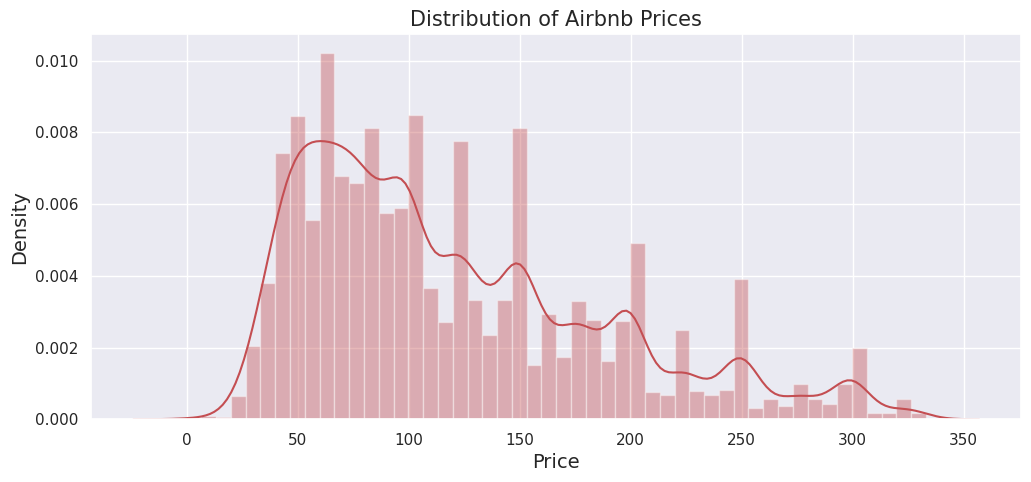

In [ ]:
# Create a figure with a custom size
plt.figure(figsize=(12, 5))

# Set the seaborn theme to darkgrid
sns.set_theme(style='darkgrid')

# Create a histogram of the 'price' column of the Airbnb_df dataframe
# using sns distplot function and specifying the color as red
sns.distplot(Airbnb_df['price'],color=('r'))

# Add labels to the x-axis and y-axis
plt.xlabel('Price', fontsize=14)
plt.ylabel('Density', fontsize=14)

# Add a title to the plot
plt.title('Distribution of Airbnb Prices',fontsize=15)



---


   **(2) Total Listing/Property count in Each Neighborhood Group using Count plot**




In [ ]:
# Count the number of listings in each neighborhood group and store the result in a Pandas series
counts = Airbnb_df['neighbourhood_group'].value_counts()

# Reset the index of the series so that the neighborhood groups become columns in the resulting dataframe
Top_Neighborhood_group = counts.reset_index()

# Rename the columns of the dataframe to be more descriptive
Top_Neighborhood_group.columns = ['Neighborhood_Groups', 'Listing_Counts']

# display the resulting DataFrame
Top_Neighborhood_group


Neighborhood_Groups  Listing_Counts
0           Manhattan           19501
1            Brooklyn           19415
2              Queens            5567
3               Bronx            1070
4       Staten Island             365

Text(0, 0.5, 'total listings counts')

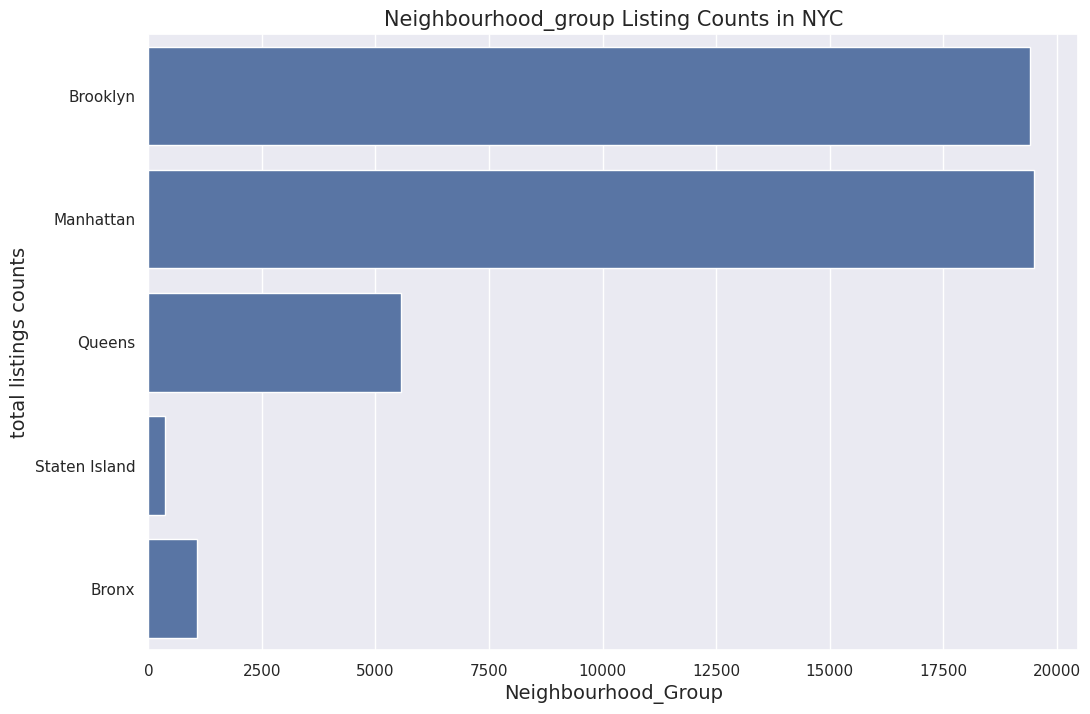

In [ ]:
# Set the figure size
plt.figure(figsize=(12, 8))

# Create a countplot of the neighbourhood group data
sns.countplot(Airbnb_df['neighbourhood_group'])

# Set the title of the plot
plt.title('Neighbourhood_group Listing Counts in NYC', fontsize=15)

# Set the x-axis label
plt.xlabel('Neighbourhood_Group', fontsize=14)

# Set the y-axis label
plt.ylabel('total listings counts', fontsize=14)



---

**(3) Average Price Of Each Neighborhood Group using Point Plot**

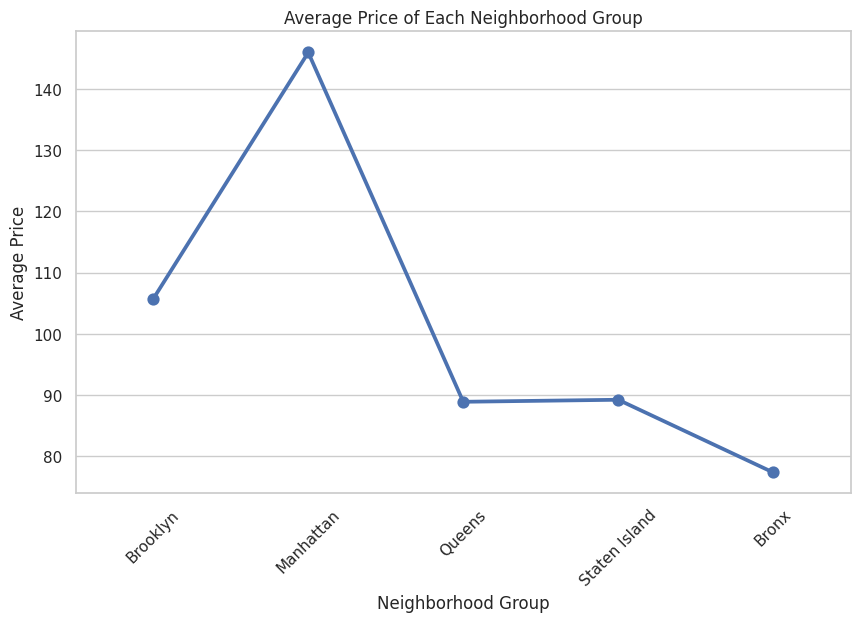

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style of the plot
sns.set_style("whitegrid")

# Create the point plot
plt.figure(figsize=(10, 6))
sns.pointplot(x="neighbourhood_group", y="price", data=Airbnb_df, ci=None)

# Set the title and labels
plt.title("Average Price of Each Neighborhood Group")
plt.xlabel("Neighborhood Group")
plt.ylabel("Average Price")

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()


Text(0.5, 1.0, 'Average Price by Neighbourhood Group')

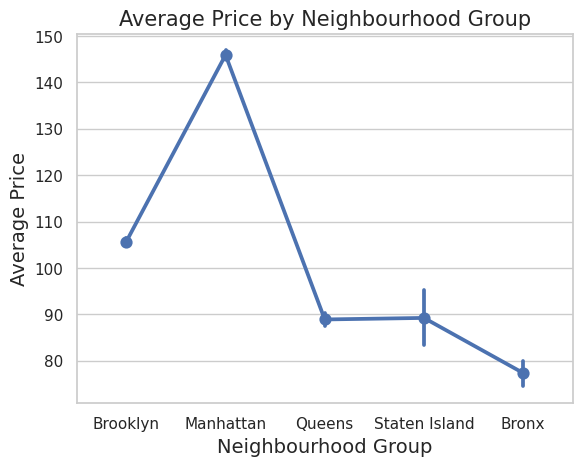

In [ ]:
#import mean function from the statistics module
from statistics import mean

# Create the point plot
sns.pointplot(x = 'neighbourhood_group', y='price', data=Airbnb_df, estimator = np.mean)

# Add axis labels and a title
plt.xlabel('Neighbourhood Group',fontsize=14)
plt.ylabel('Average Price',fontsize=14)
plt.title('Average Price by Neighbourhood Group',fontsize=15)



---
**(4) Top Neighborhoods by Listing/property using Bar plot**

In [ ]:
# create a new DataFrame that displays the top 10 neighborhoods in the Airbnb NYC dataset based on the number of listings in each neighborhood
Top_Neighborhoods = Airbnb_df['neighbourhood'].value_counts()[:10].reset_index()

# rename the columns of the resulting DataFrame to 'Top_Neighborhoods' and 'Listing_Counts'
Top_Neighborhoods.columns = ['Top_Neighborhoods', 'Listing_Counts']

# display the resulting DataFrame
Top_Neighborhoods



Top_Neighborhoods  Listing_Counts
0        Williamsburg            3732
1  Bedford-Stuyvesant            3638
2              Harlem            2585
3            Bushwick            2438
4     Upper West Side            1788
5      Hell's Kitchen            1731
6        East Village            1714
7     Upper East Side            1670
8       Crown Heights            1519
9             Midtown            1143

Text(0.5, 1.0, 'Listings by Top Neighborhoods in NYC')

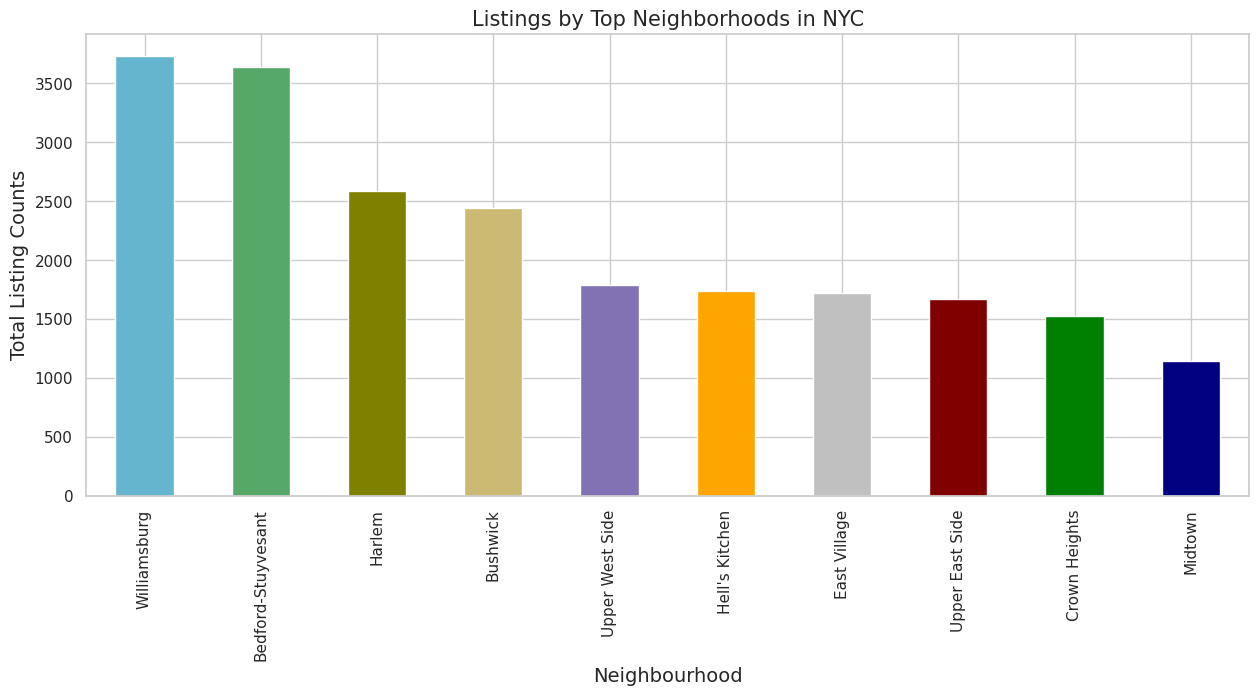

In [ ]:
# Get the top 10 neighborhoods by listing count
top_10_neigbourhoods = Airbnb_df['neighbourhood'].value_counts().nlargest(10)

# Create a list of colors to use for the bars
colors = ['c', 'g', 'olive', 'y', 'm', 'orange', '#C0C0C0', '#800000', '#008000', '#000080']

# Create a bar plot of the top 10 neighborhoods using the specified colors
top_10_neigbourhoods.plot(kind='bar', figsize=(15, 6), color = colors)

# Set the x-axis label
plt.xlabel('Neighbourhood', fontsize=14)

# Set the y-axis label
plt.ylabel('Total Listing Counts', fontsize=14)

# Set the title of the plot
plt.title('Listings by Top Neighborhoods in NYC', fontsize=15)




---

**(5) Top Hosts With More Listing/Property using Bar chart**

In [ ]:
# create a new DataFrame that displays the top 10 hosts in the Airbnb NYC dataset based on the number of listings each host has
top_10_hosts = Airbnb_df['host_name'].value_counts()[:10].reset_index()

# rename the columns of the resulting DataFrame to 'host_name' and 'Total_listings'
top_10_hosts.columns = ['host_name', 'Total_listings']

# display the resulting DataFrame
top_10_hosts



host_name  Total_listings
0       Michael             383
1         David             368
2          John             276
3  Sonder (NYC)             272
4          Alex             253
5         Sarah             221
6        Daniel             212
7         Maria             197
8       Jessica             185
9          Mike             184

Text(0.5, 1.0, 'top 10 hosts on the basis of no of listings in entire NYC!')

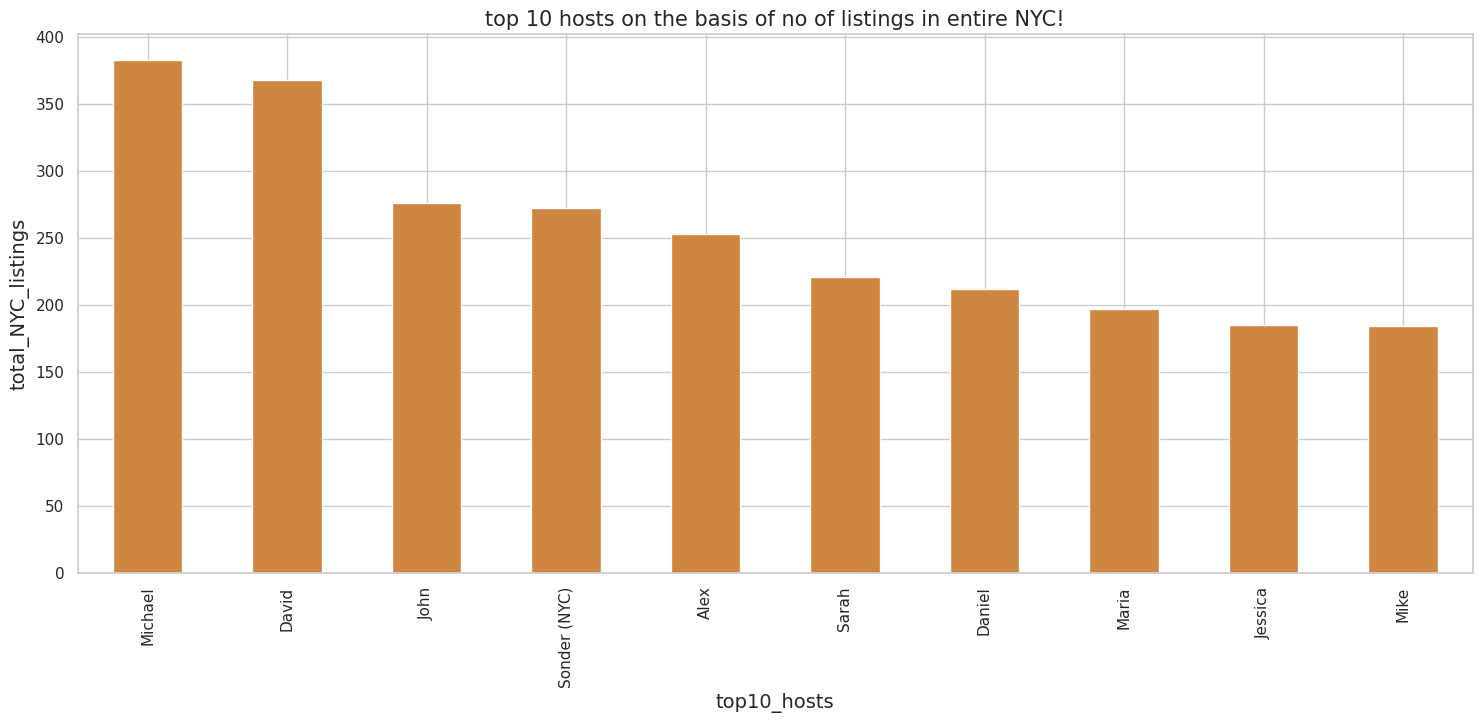

In [ ]:
# Get the top 10 hosts by listing count
top_hosts = Airbnb_df['host_name'].value_counts()[:10]

# Create a bar plot of the top 10 hosts
top_hosts.plot(kind='bar', color='peru', figsize=(18, 7))

# Set the x-axis label
plt.xlabel('top10_hosts', fontsize=14)

# Set the y-axis label
plt.ylabel('total_NYC_listings', fontsize=14)

# Set the title of the plot
plt.title('top 10 hosts on the basis of no of listings in entire NYC!', fontsize=15)




---

**(6) Number Of Active Hosts Per Location Using Line Chart**

In [ ]:
# create a new DataFrame that displays the number of hosts in each neighborhood group in the Airbnb NYC dataset
hosts_per_location = Airbnb_df.groupby('neighbourhood_group')['listing_id'].count().reset_index()

# rename the columns of the resulting DataFrame to 'Neighbourhood_Groups' and 'Host_counts'
hosts_per_location.columns = ['Neighbourhood_Groups', 'Host_counts']

# display the resulting DataFrame
hosts_per_location



Neighbourhood_Groups  Host_counts
0                Bronx         1070
1             Brooklyn        19415
2            Manhattan        19501
3               Queens         5567
4        Staten Island          365



---
**(7) Average Minimum Price In Neighborhoods using Scatter and Bar chart**


In [ ]:
# Group the Airbnb dataset by neighborhood group and calculate the mean of each group
grouped = Airbnb_df.groupby("neighbourhood_group")['price'].mean().reset_index()

# Rename the "price" column to "avg_price"
grouped = grouped.rename(columns={"price": "avg_price"})

# Display the resulting DataFrame
print(grouped)


  neighbourhood_group   avg_price
0               Bronx   77.365421
1            Brooklyn  105.699614
2           Manhattan  145.904620
3              Queens   88.904437
4       Staten Island   89.235616


<Axes: title={'center': 'Average Airbnb Price by Neighborhoods in New York City'}, xlabel='longitude', ylabel='latitude'>

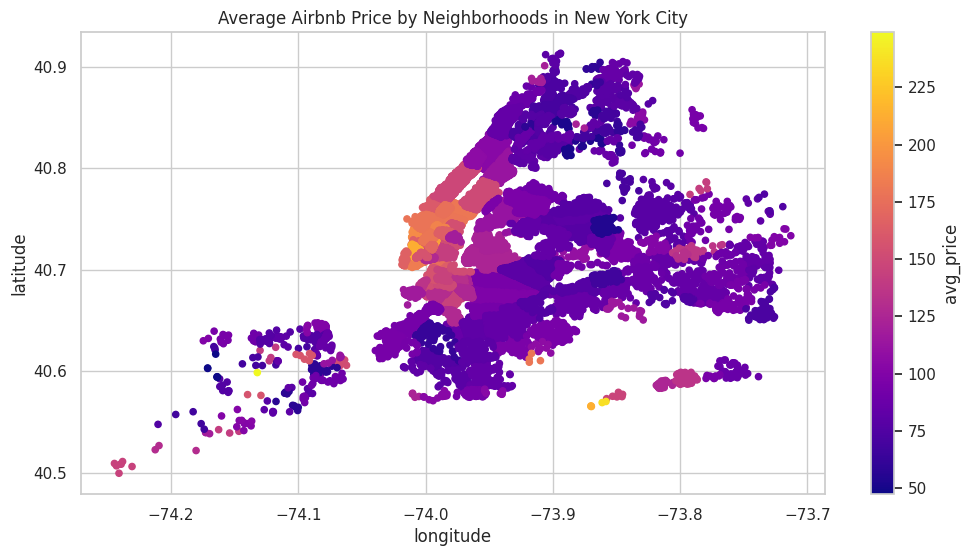

In [ ]:
# Convert the 'price' column to numeric type
Airbnb_df['price'] = pd.to_numeric(Airbnb_df['price'], errors='coerce')

# Group the data by neighborhood and calculate the average price
neighbourhood_avg_price = Airbnb_df.groupby("neighbourhood")["price"].mean()

# Create a new DataFrame with the average price for each neighborhood
neighbourhood_prices = pd.DataFrame({"neighbourhood": neighbourhood_avg_price.index, "avg_price": neighbourhood_avg_price.values})

# Merge the average price data with the original DataFrame
df = Airbnb_df.merge(neighbourhood_prices, on="neighbourhood")

# Create the scattermapbox plot
fig = df.plot.scatter(x="longitude", y="latitude", c="avg_price", title="Average Airbnb Price by Neighborhoods in New York City", figsize=(12,6), cmap="plasma")
fig


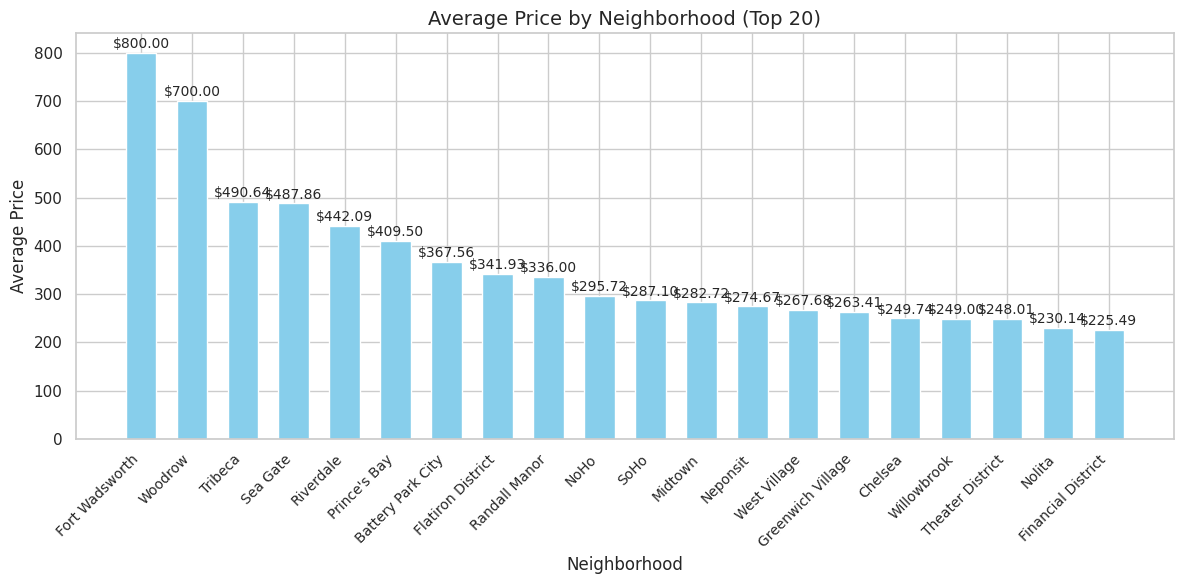

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data from a CSV file
airbnb_data = pd.read_csv('Airbnb NYC 2019.csv')

# Calculate the average price for each neighborhood
neighbourhood_avg_price = airbnb_data.groupby('neighbourhood')['price'].mean()

# Sort the neighborhoods by average price in descending order
neighbourhood_avg_price_sorted = neighbourhood_avg_price.sort_values(ascending=False)

# Reset the index to turn the neighbourhood column into a regular column
neighbourhood_avg_price_sorted_with_group = neighbourhood_avg_price_sorted.reset_index()

# Extract the values from the dataset
neighborhoods = neighbourhood_avg_price_sorted_with_group['neighbourhood']
prices = neighbourhood_avg_price_sorted_with_group['price']

# Create the bar plot
plt.figure(figsize=(12, 6))
plt.bar(neighborhoods[:20], prices[:20], width=0.6, color='skyblue')
plt.xlabel('Neighborhood', fontsize=12)
plt.ylabel('Average Price', fontsize=12)
plt.title('Average Price by Neighborhood (Top 20)', fontsize=14)

# Rotate and align the x-axis labels for better readability
plt.xticks(rotation=45, ha='right', fontsize=10)

# Adjust the bottom margin to prevent label overlapping
plt.subplots_adjust(bottom=0.3)

# Add value labels to the bars
for i, price in enumerate(prices[:20]):
    plt.text(i, price + 10, f'${price:.2f}', ha='center', fontsize=10)

# Show the plot
plt.tight_layout()
plt.show()



---
**(8) Total Counts Of Each Room Type**


In [ ]:
# create a new DataFrame that displays the number of listings of each room type in the Airbnb NYC dataset
top_room_type = Airbnb_df['room_type'].value_counts().reset_index()

# rename the columns of the resulting DataFrame to 'Room_Type' and 'Total_counts'
top_room_type.columns = ['Room_Type', 'Total_counts']

# display the resulting DataFrame
top_room_type



Room_Type  Total_counts
0  Entire home/apt         22784
1     Private room         21996
2      Shared room          1138

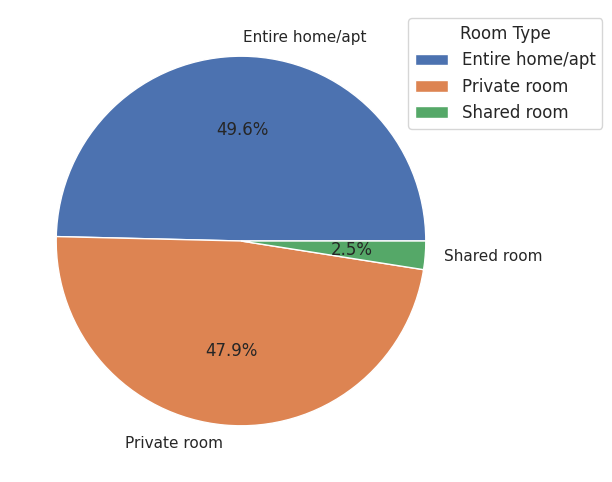

In [ ]:
# Set the figure size
plt.figure(figsize=(10, 6))

# Get the room type counts
room_type_counts = Airbnb_df['room_type'].value_counts()

# Set the labels and sizes for the pie chart
labels = room_type_counts.index
sizes = room_type_counts.values

# Create the pie chart
plt.pie(sizes, labels=labels, autopct='%1.1f%%')

# Add a legend to the chart
plt.legend(title='Room Type', bbox_to_anchor=(0.8, 0, 0.5, 1), fontsize='12')

# Show the plot
plt.show()




---
**(9) Stay Requirement counts by Minimum Nights using Bar chart**


In [ ]:
# Group the DataFrame by the minimum_nights column and count the number of rows in each group
min_nights_count = Airbnb_df.groupby('minimum_nights').size().reset_index(name = 'count')

# Sort the resulting DataFrame in descending order by the count column
min_nights_count = min_nights_count.sort_values('count', ascending=False)

# Select the top 10 rows
min_nights_count = min_nights_count.head(15)

# Reset the index
min_nights_count = min_nights_count.reset_index(drop=True)

# Display the resulting DataFrame
min_nights_count

minimum_nights  count
0                1  12067
1                2  11080
2                3   7375
3               30   3489
4                4   3066
5                5   2821
6                7   1951
7                6    679
8               14    539
9               10    462
10              29    327
11              15    272
12              20    215
13              31    189
14              28    173

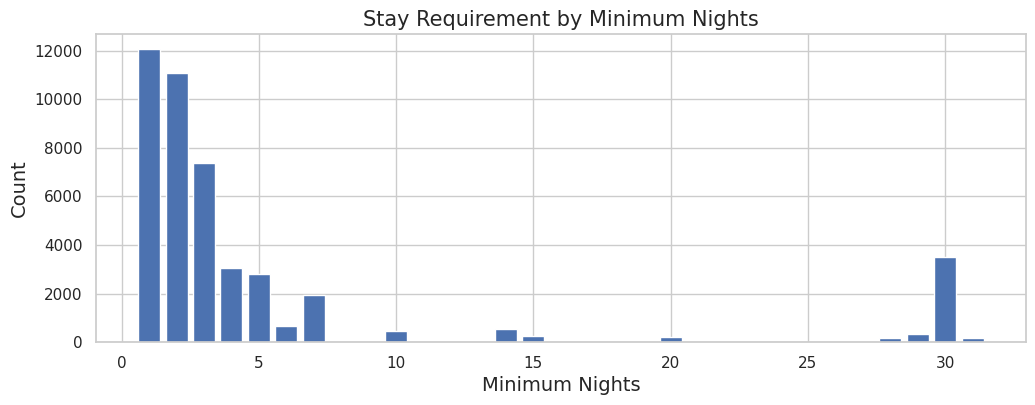

In [ ]:
# Extract the minimum_nights and count columns from the DataFrame
minimum_nights = min_nights_count['minimum_nights']
count = min_nights_count['count']

# Set the figure size
plt.figure(figsize=(12, 4))

# Create the bar plot
plt.bar(minimum_nights, count)

# Add axis labels and a title
plt.xlabel('Minimum Nights', fontsize='14')
plt.ylabel('Count', fontsize='14')
plt.title('Stay Requirement by Minimum Nights', fontsize='15')

# Show the plot
plt.show()



---
**(10) Total Reviews by Each Neighborhood Group using Pie Chart**


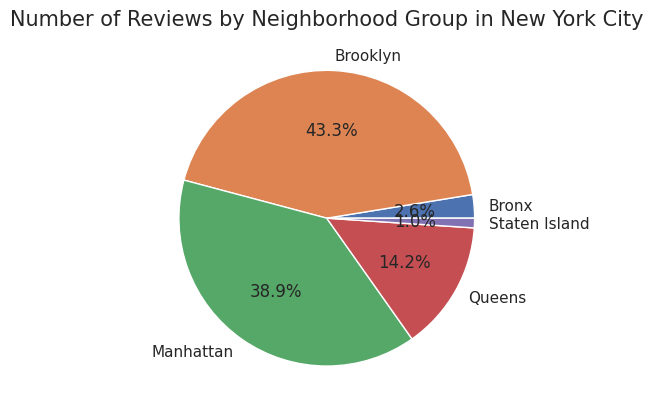

In [ ]:
# Group the data by neighborhood group and calculate the total number of reviews
reviews_by_neighbourhood_group = Airbnb_df.groupby("neighbourhood_group")["total_reviews"].sum()

# Create a pie chart
plt.pie(reviews_by_neighbourhood_group, labels=reviews_by_neighbourhood_group.index, autopct='%1.1f%%')
plt.title("Number of Reviews by Neighborhood Group in New York City", fontsize='15')

# Display the chart
plt.show()



**(13)Count Of Each Room Types In Entire NYC Using Multiple Bar Plot**

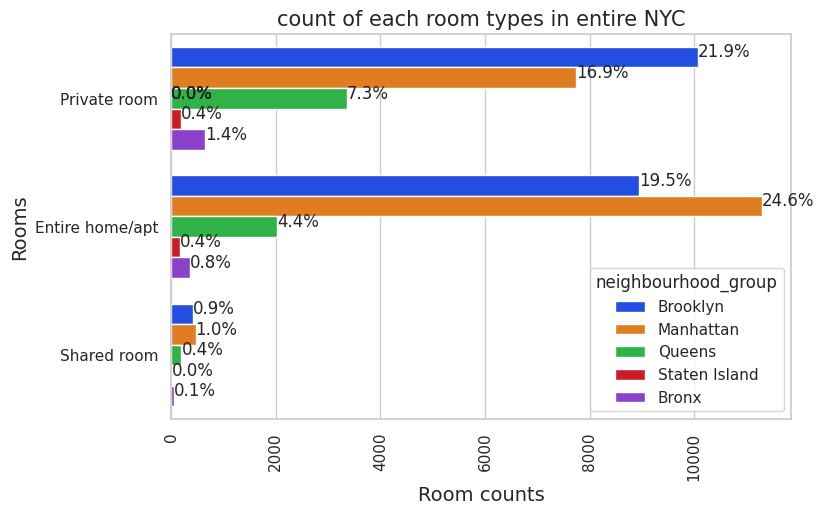

In [ ]:
# Now analysis Room types count in Neighbourhood groups in NYC

# Set the size of the plot
plt.rcParams['figure.figsize'] = (8, 5)

# Create a countplot using seaborn
ax = sns.countplot(y='room_type', hue='neighbourhood_group', data=Airbnb_df, palette='bright')

# Calculate the total number of room_type values
total = len(Airbnb_df['room_type'])

# Add percentage labels to each bar in the plot
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))

# Add a title to the plot
plt.title('count of each room types in entire NYC', fontsize='15')

# Add a label to the x-axis
plt.xlabel('Room counts', fontsize='14')

# Rotate the x-tick labels
plt.xticks(rotation=90)

# Add a label to the y-axis
plt.ylabel('Rooms', fontsize='14')

# Display the plot
plt.show()



Text(0.5, 1.0, 'Location Co-ordinates')

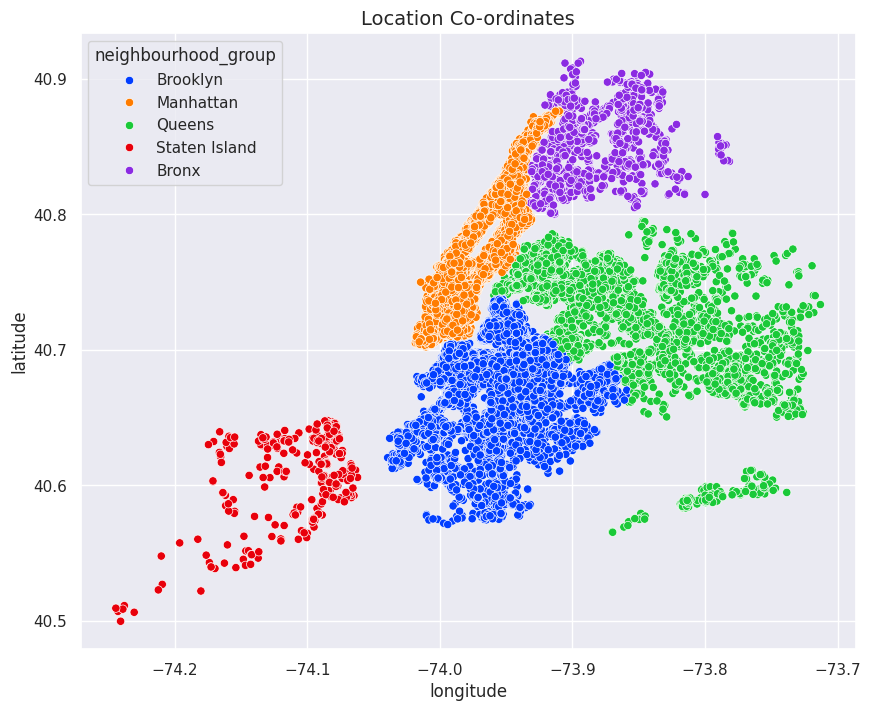

In [ ]:
#trying to find where the coordinates belong from the latitude and longitude

# set the default figure size for the seaborn library
sns.set(rc={"figure.figsize": (10, 8)})

# create a scatter plot that displays the longitude and latitude of the listings in the Airbnb NYC dataset
ax = sns.scatterplot(data=Airbnb_df, x="longitude", y="latitude", hue='neighbourhood_group', palette='bright')

# set the title of the plot
ax.set_title('Location Co-ordinates', fontsize='14')



Text(0.5, 1.0, 'Distribution of type of rooms across NYC')

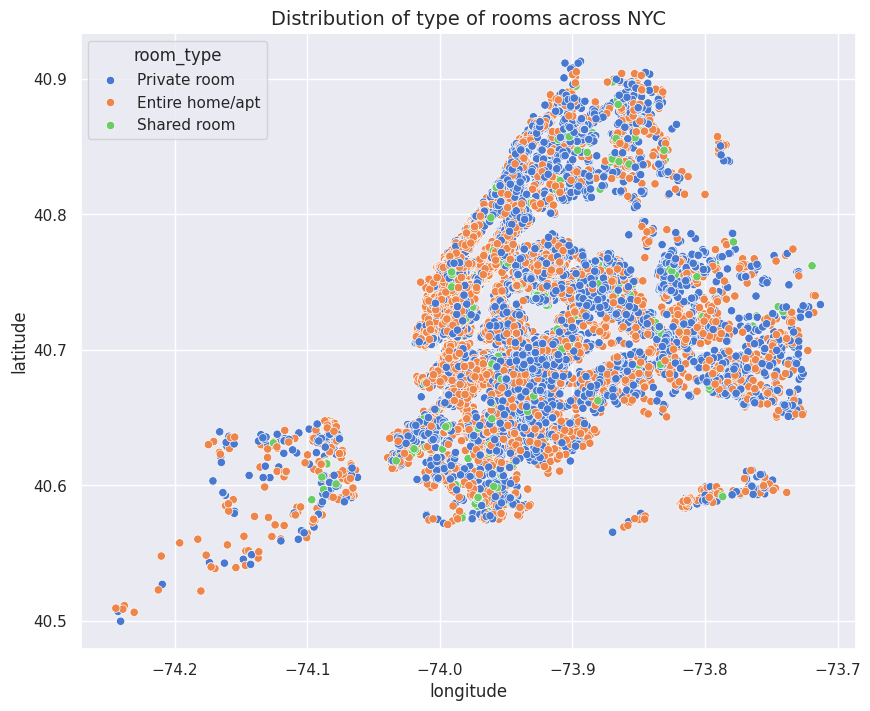

In [ ]:
# Let's observe the type of room_types

# set the default figure size for the seaborn library
sns.set(rc={"figure.figsize": (10, 8)})

# create a scatter plot that displays the longitude and latitude of the listings in the Airbnb NYC dataset with room_types.
ax = sns.scatterplot(x=Airbnb_df.longitude, y=Airbnb_df.latitude, hue=Airbnb_df.room_type, palette='muted')

# set the title of the plot
ax.set_title('Distribution of type of rooms across NYC', fontsize='14')





---
**(15) Price variations in NYC Neighbourhood groups using scatter plot**


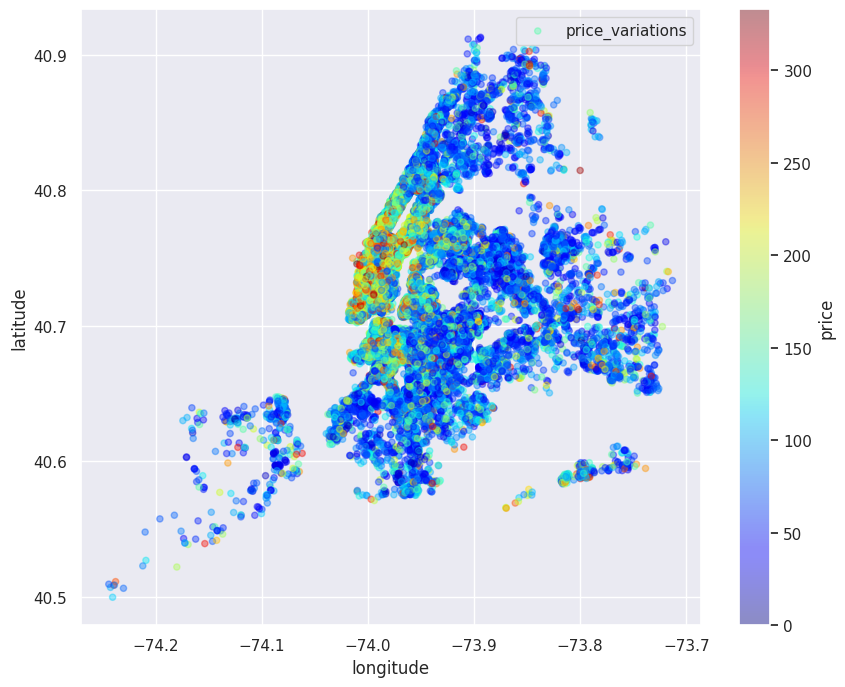

In [ ]:
# Let's have an idea of the price variations in neighborhood_groups

# create a scatter plot that displays the longitude and latitude of the listings in the Airbnb NYC dataset, with the color of each point indicating the price of the listing
lat_long = Airbnb_df.plot(kind='scatter', x='longitude', y='latitude', label='price_variations', c='price',
                  cmap=plt.get_cmap('jet'), colorbar=True, alpha=0.4, figsize=(10, 8))

# add a legend to the plot
lat_long.legend()


---
**(16) Find Best Location Listing/Property Location For Travelers and Hosts**

<Axes: title={'center': 'Average Airbnb Reviews by Neighborhoods in New York City'}, xlabel='longitude', ylabel='latitude'>

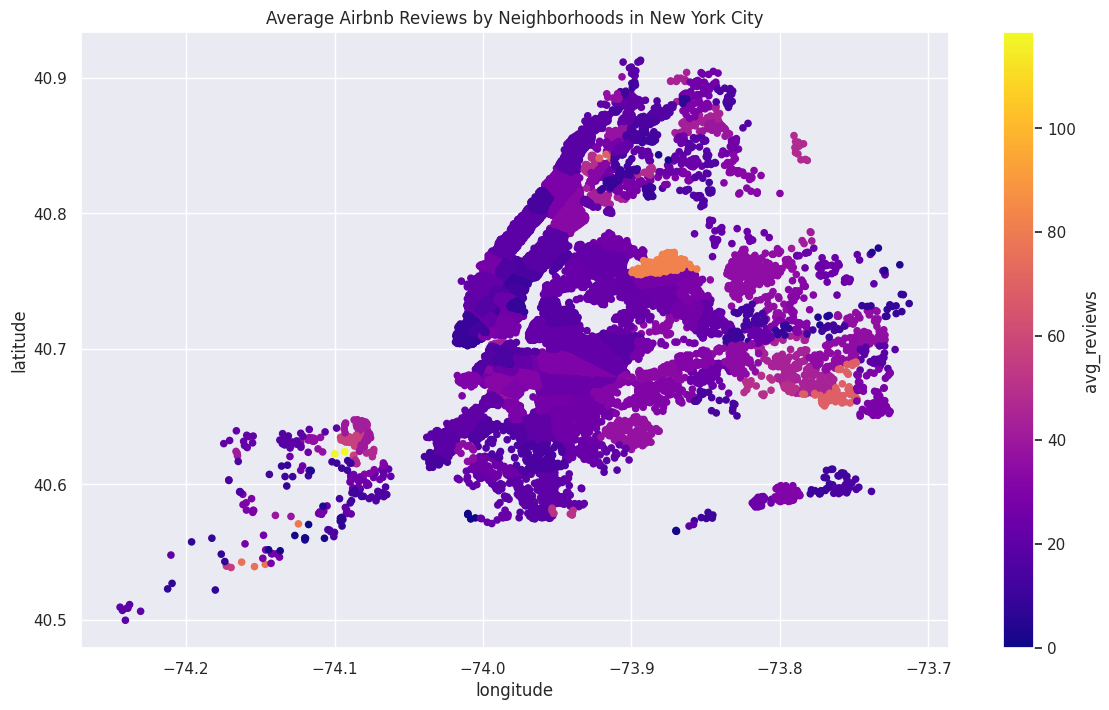

In [ ]:
# Group the data by neighborhood and calculate the average number of reviews
neighbourhood_avg_reviews = Airbnb_df.groupby("neighbourhood")["total_reviews"].mean()

# Create a new DataFrame with the average number of reviews for each neighborhood
neighbourhood_reviews = pd.DataFrame({"neighbourhood": neighbourhood_avg_reviews.index, "avg_reviews": neighbourhood_avg_reviews.values})

# Merge the average number of reviews data with the original DataFrame
df = Airbnb_df.merge(neighbourhood_reviews, on="neighbourhood")

# Create the scattermapbox plot
fig = df.plot.scatter(x="longitude", y="latitude", c="avg_reviews", title="Average Airbnb Reviews by Neighborhoods in New York City", figsize=(14,8), cmap="plasma")

# Display the scatter map
fig





---
**(17) Correlation Heatmap Visualization**




In [ ]:
# Select only numeric columns
numeric_cols = Airbnb_df.select_dtypes(include=[np.number]).columns
corr = Airbnb_df[numeric_cols].corr()


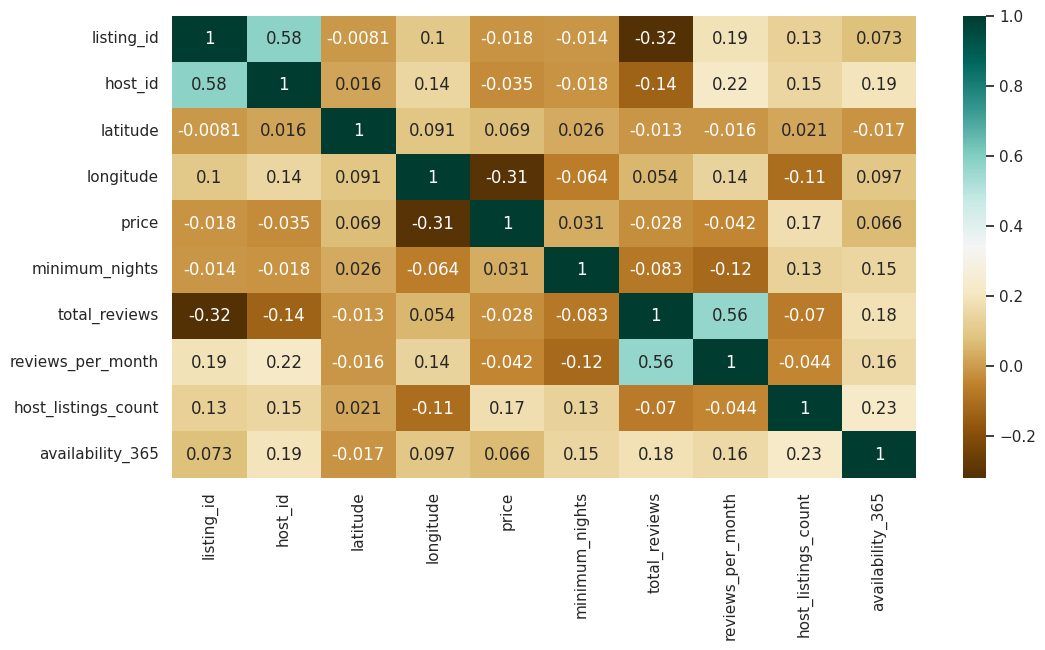

In [ ]:
# Set the figure size
plt.figure(figsize=(12,6))

# Visualize correlations as a heatmap
sns.heatmap(corr, cmap='BrBG',annot=True)

# Display heatmap
plt.show()




---

**(18) Pair Plot Visualization**

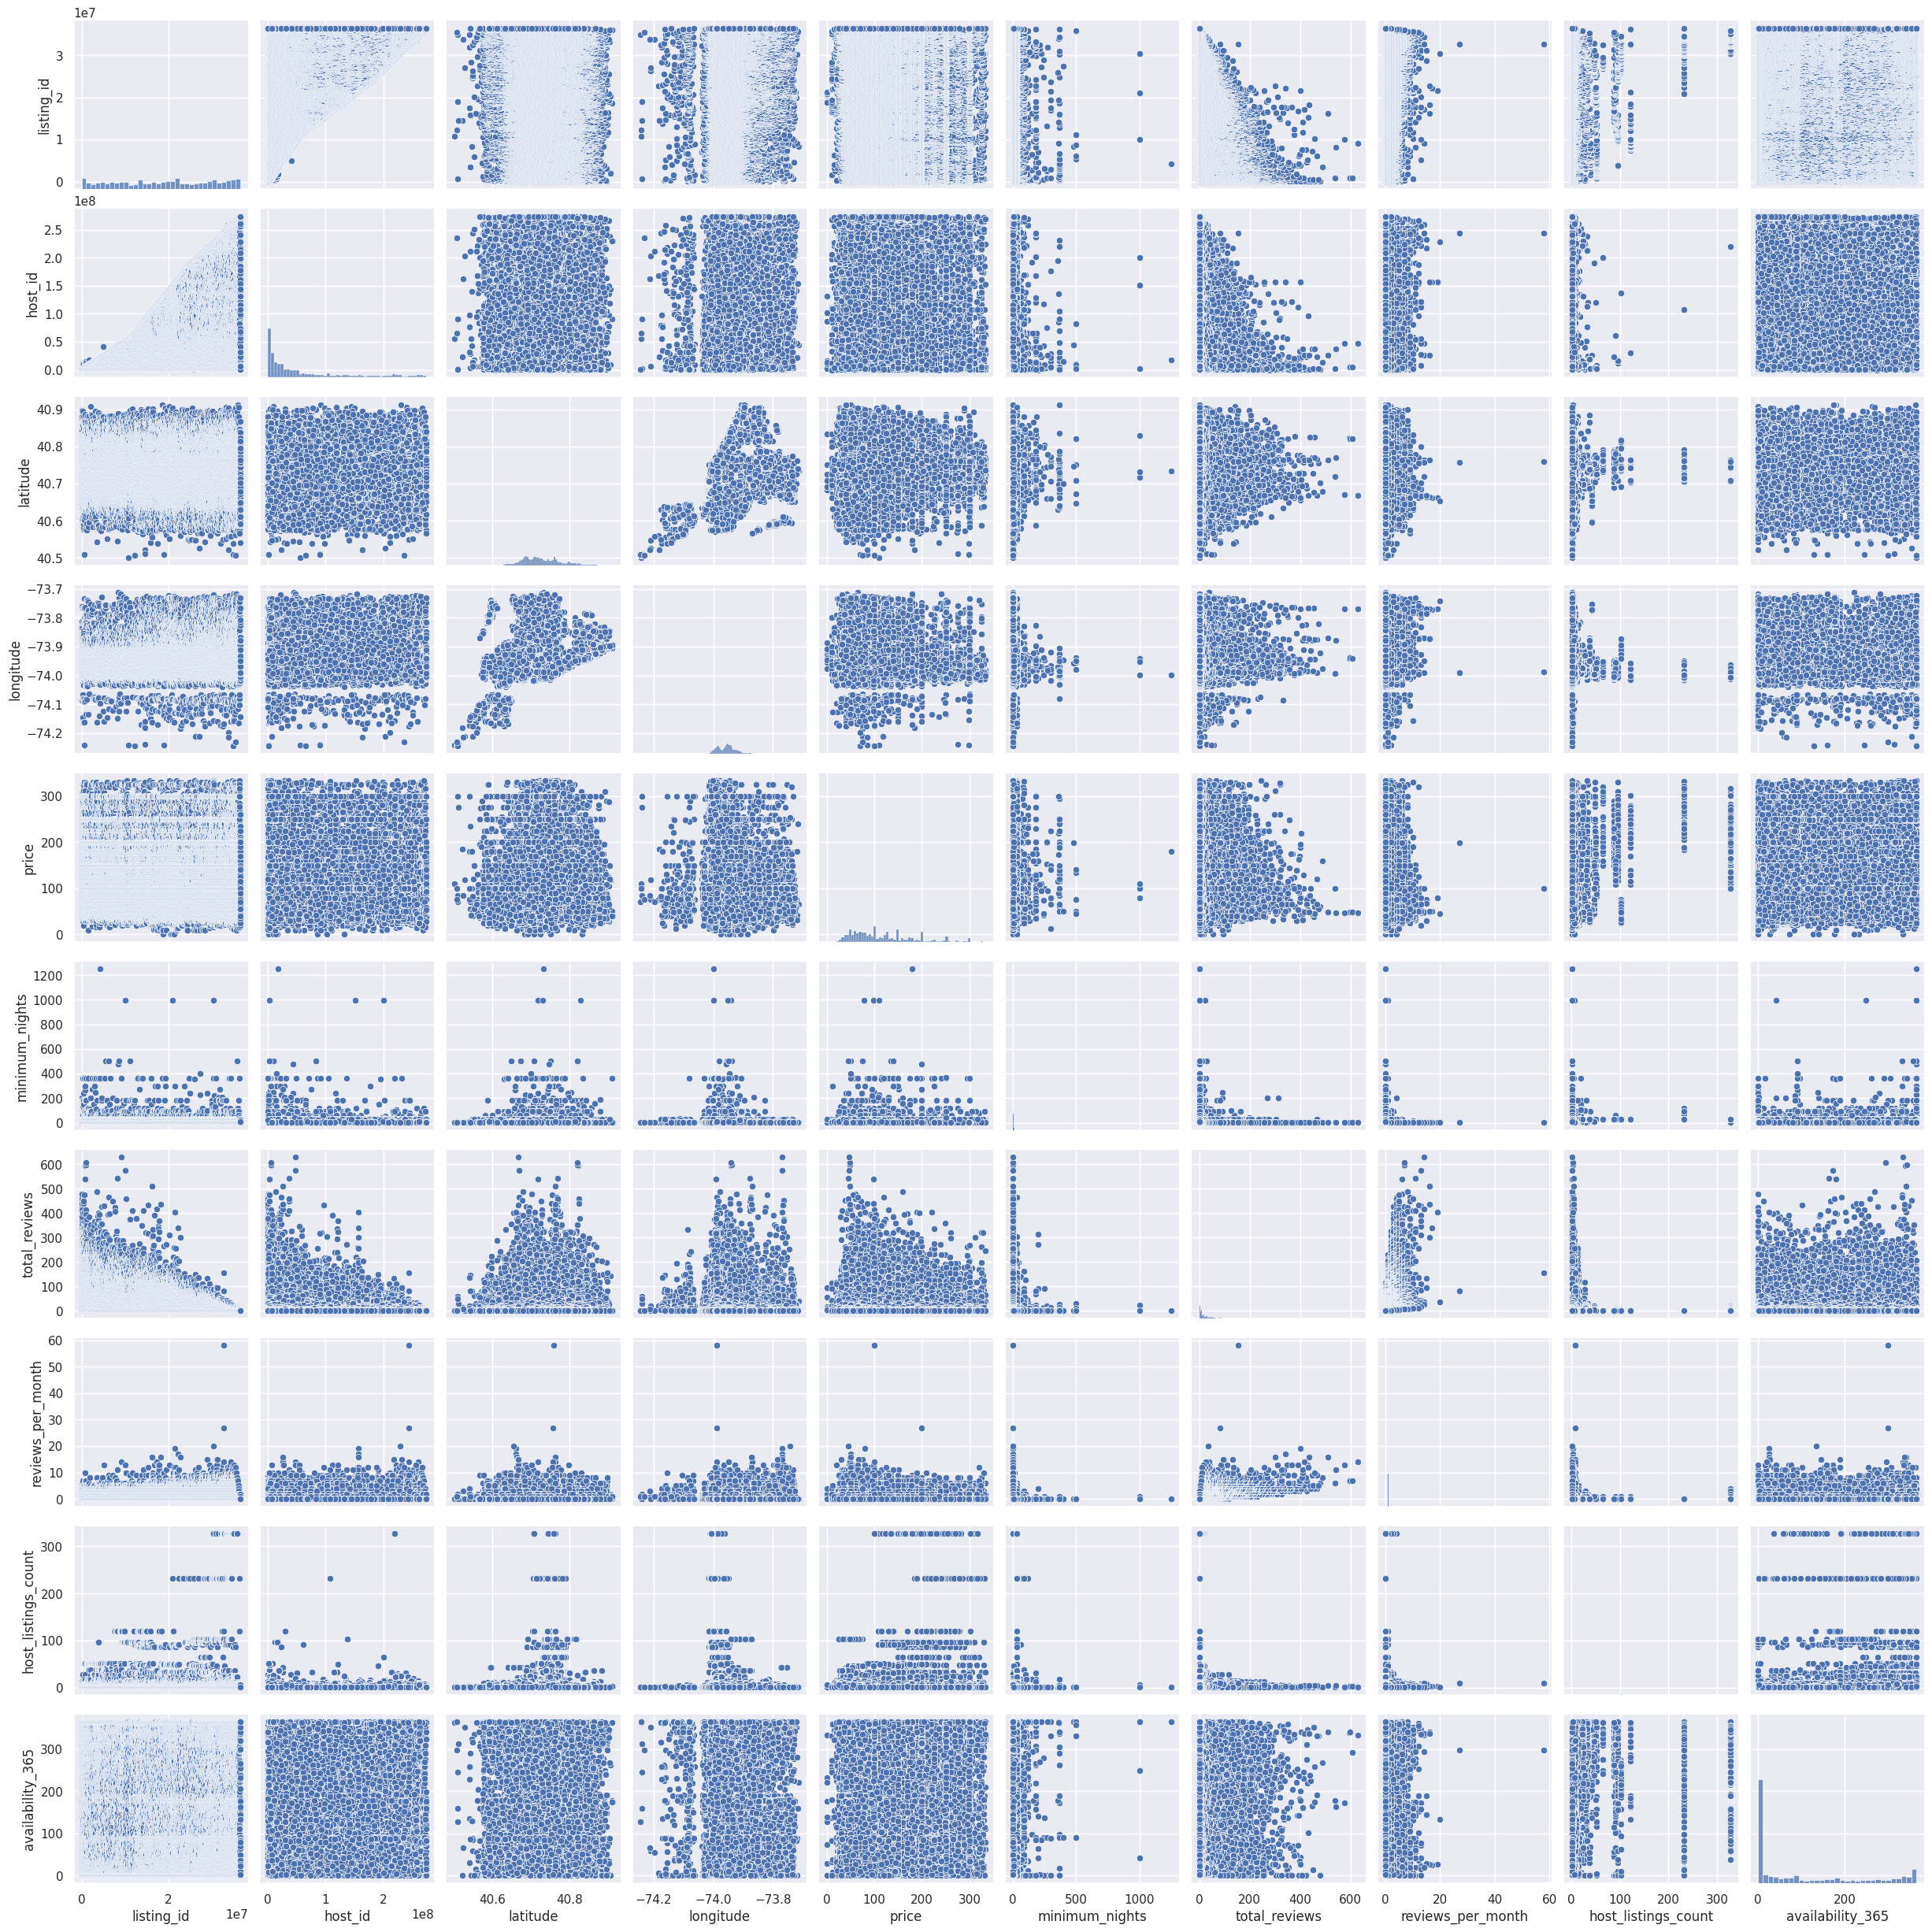

In [ ]:
# create a pairplot using the seaborn library to visualize the relationships between different variables in the Airbnb NYC dataset
sns.pairplot(Airbnb_df)

# show the plot
plt.show()



### New Datasets

In [ ]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 3.2 MB/s eta 0:00:00


In [ ]:
import warnings
warnings.simplefilter('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import  LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, KFold
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from catboost import CatBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor

In [ ]:
df = pd.read_csv("train.csv")

In [ ]:
df

id  log_price property_type        room_type  \
0       6901257   5.010635     Apartment  Entire home/apt   
1       6304928   5.129899     Apartment  Entire home/apt   
2       7919400   4.976734     Apartment  Entire home/apt   
3      13418779   6.620073         House  Entire home/apt   
4       3808709   4.744932     Apartment  Entire home/apt   
...         ...        ...           ...              ...   
74106  14549287   4.605170     Apartment     Private room   
74107  13281809   5.043425     Apartment  Entire home/apt   
74108  18688039   5.220356     Apartment  Entire home/apt   
74109  17045948   5.273000     Apartment  Entire home/apt   
74110   3534845   4.852030          Boat  Entire home/apt   

                                               amenities  accommodates  \
0      {"Wireless Internet","Air conditioning",Kitche...             3   
1      {"Wireless Internet","Air conditioning",Kitche...             7   
2      {TV,"Cable TV","Wireless Internet","Air condit...             5   
3      {TV,"Cable TV",Internet,"Wireless Internet",Ki...             4   
4      {TV,Internet,"Wireless Internet","Air conditio...             2   
...                                                  ...           ...   
74106                                                 {}             1   
74107  {TV,"Cable TV",Internet,"Wireless Internet",Ki...             4   
74108  {TV,Internet,"Wireless Internet","Air conditio...             5   
74109  {TV,"Wireless Internet","Air conditioning",Kit...             2   
74110  {TV,Internet,"Wireless Internet",Kitchen,"Free...             4   

       bathrooms  bed_type cancellation_policy  cleaning_fee  ...   latitude  \
0            1.0  Real Bed              strict          True  ...  40.696524   
1            1.0  Real Bed              strict          True  ...  40.766115   
2            1.0  Real Bed            moderate          True  ...  40.808110   
3            1.0  Real Bed            flexible          True  ...  37.772004   
4            1.0  Real Bed            moderate          True  ...  38.925627   
...          ...       ...                 ...           ...  ...        ...   
74106        1.0  Real Bed            flexible         False  ...  40.709025   
74107        2.0  Real Bed            moderate          True  ...  33.871549   
74108        1.0  Real Bed            moderate          True  ...  40.706749   
74109        1.0  Real Bed              strict          True  ...  40.738535   
74110        1.0  Real Bed            moderate         False  ...  33.761096   

        longitude                                        name  \
0      -73.991617              Beautiful brownstone 1-bedroom   
1      -73.989040    Superb 3BR Apt Located Near Times Square   
2      -73.943756                            The Garden Oasis   
3     -122.431619          Beautiful Flat in the Heart of SF!   
4      -77.034596                  Great studio in midtown DC   
...           ...                                         ...   
74106  -73.939405                           one room bushwick   
74107 -118.396053                Spacious Hermosa 2 BR on PCH   
74108  -73.942377  Modern 2 Bedroom Apartment in Williamsburg   
74109  -74.000157        Designer's Apartment in HEART of NYC   
74110 -118.192409              Cozy Boat at Shoreline Village   

          neighbourhood number_of_reviews review_scores_rating  \
0      Brooklyn Heights                 2                100.0   
1        Hell's Kitchen                 6                 93.0   
2                Harlem                10                 92.0   
3          Lower Haight                 0                  NaN   
4      Columbia Heights                 4                 40.0   
...                 ...               ...                  ...   
74106      Williamsburg                 0                  NaN   
74107     Hermosa Beach                16                 93.0   
74108      Williamsburg                43              

In [ ]:
df.shape

(74111, 29)

In [ ]:
df.columns

Index(['id', 'log_price', 'property_type', 'room_type', 'amenities',
       'accommodates', 'bathrooms', 'bed_type', 'cancellation_policy',
       'cleaning_fee', 'city', 'description', 'first_review',
       'host_has_profile_pic', 'host_identity_verified', 'host_response_rate',
       'host_since', 'instant_bookable', 'last_review', 'latitude',
       'longitude', 'name', 'neighbourhood', 'number_of_reviews',
       'review_scores_rating', 'thumbnail_url', 'zipcode', 'bedrooms', 'beds'],
      dtype='object')

In [ ]:
df.describe()

id     log_price  accommodates     bathrooms      latitude  \
count  7.411100e+04  74111.000000  74111.000000  73911.000000  74111.000000   
mean   1.126662e+07      4.782069      3.155146      1.235263     38.445958   
std    6.081735e+06      0.717394      2.153589      0.582044      3.080167   
min    3.440000e+02      0.000000      1.000000      0.000000     33.338905   
25%    6.261964e+06      4.317488      2.000000      1.000000     34.127908   
50%    1.225415e+07      4.709530      2.000000      1.000000     40.662138   
75%    1.640226e+07      5.220356      4.000000      1.000000     40.746096   
max    2.123090e+07      7.600402     16.000000      8.000000     42.390437   

          longitude  number_of_reviews  review_scores_rating      bedrooms  \
count  74111.000000       74111.000000          57389.000000  74020.000000   
mean     -92.397525          20.900568             94.067365      1.265793   
std       21.705322          37.828641              7.836556      0.852143   
min     -122.511500           0.000000             20.000000      0.000000   
25%     -118.342374           1.000000             92.000000      1.000000   
50%      -76.996965           6.000000             96.000000      1.000000   
75%      -73.954660          23.000000            100.000000      1.000000   
max      -70.985047         605.000000            100.000000     10.000000   

               beds  
count  73980.000000  
mean       1.710868  
std        1.254142  
min        0.000000  
25%        1.000000  
50%        1.000000  
75%        2.000000  
max       18.000000

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74111 entries, 0 to 74110
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      74111 non-null  int64  
 1   log_price               74111 non-null  float64
 2   property_type           74111 non-null  object 
 3   room_type               74111 non-null  object 
 4   amenities               74111 non-null  object 
 5   accommodates            74111 non-null  int64  
 6   bathrooms               73911 non-null  float64
 7   bed_type                74111 non-null  object 
 8   cancellation_policy     74111 non-null  object 
 9   cleaning_fee            74111 non-null  bool   
 10  city                    74111 non-null  object 
 11  description             74111 non-null  object 
 12  first_review            58247 non-null  object 
 13  host_has_profile_pic    73923 non-null  object 
 14  host_identity_verified  73923 non-null

In [ ]:
df.dtypes

id                          int64
log_price                 float64
property_type              object
room_type                  object
amenities                  object
accommodates                int64
bathrooms                 float64
bed_type                   object
cancellation_policy        object
cleaning_fee                 bool
city                       object
description                object
first_review               object
host_has_profile_pic       object
host_identity_verified     object
host_response_rate         object
host_since                 object
instant_bookable           object
last_review                object
latitude                  float64
longitude                 float64
name                       object
neighbourhood              object
number_of_reviews           int64
review_scores_rating      float64
thumbnail_url              object
zipcode                    object
bedrooms                  float64
beds                      float64
dtype: object

In [ ]:
index= ["host_response_rate","property_type", "room_type","accommodates","bathrooms","bed_type", "cancellation_policy", "cleaning_fee",
       "city","instant_bookable", "beds", "bedrooms", "neighbourhood","first_review", "last_review","zipcode",
       "name","host_since","thumbnail_url", "latitude", "longitude",
        "host_has_profile_pic", "host_identity_verified"]

for i in index:

    print(df[i].value_counts(), "\n")
    print("---------------------------------------------------------------")

host_response_rate
100%    43254
90%      2277
80%      1113
0%        883
50%       611
        ...  
39%         1
15%         1
31%         1
21%         1
6%          1
Name: count, Length: 80, dtype: int64 

---------------------------------------------------------------
property_type
Apartment             49003
House                 16511
Condominium            2658
Townhouse              1692
Loft                   1244
Other                   607
Guesthouse              498
Bed & Breakfast         462
Bungalow                366
Villa                   179
Dorm                    142
Guest suite             123
Camper/RV                94
Timeshare                77
Cabin                    72
In-law                   71
Hostel                   70
Boutique hotel           69
Boat                     65
Serviced apartment       21
Tent                     18
Castle                   13
Vacation home            11
Yurt                      9
Hut                       8
Treehouse

In [ ]:
for column in df.columns:

    if df[column].isnull().sum() != 0:

        print("========================================")
        print("\n{} :- {},  dtypes : {}".format(column,df[column].isnull().sum(),df[column].dtypes))


bathrooms :- 200,  dtypes : float64

first_review :- 15864,  dtypes : object

host_has_profile_pic :- 188,  dtypes : object

host_identity_verified :- 188,  dtypes : object

host_response_rate :- 18299,  dtypes : object

host_since :- 188,  dtypes : object

last_review :- 15827,  dtypes : object

neighbourhood :- 6872,  dtypes : object

review_scores_rating :- 16722,  dtypes : float64

thumbnail_url :- 8216,  dtypes : object

zipcode :- 966,  dtypes : object

bedrooms :- 91,  dtypes : float64

beds :- 131,  dtypes : float64


In [ ]:
df.last_review.fillna(method="ffill",inplace=True)
df.first_review.fillna(method="ffill",inplace=True)
df.host_since.fillna(method="ffill",inplace=True)

<Axes: xlabel='bathrooms', ylabel='Density'>

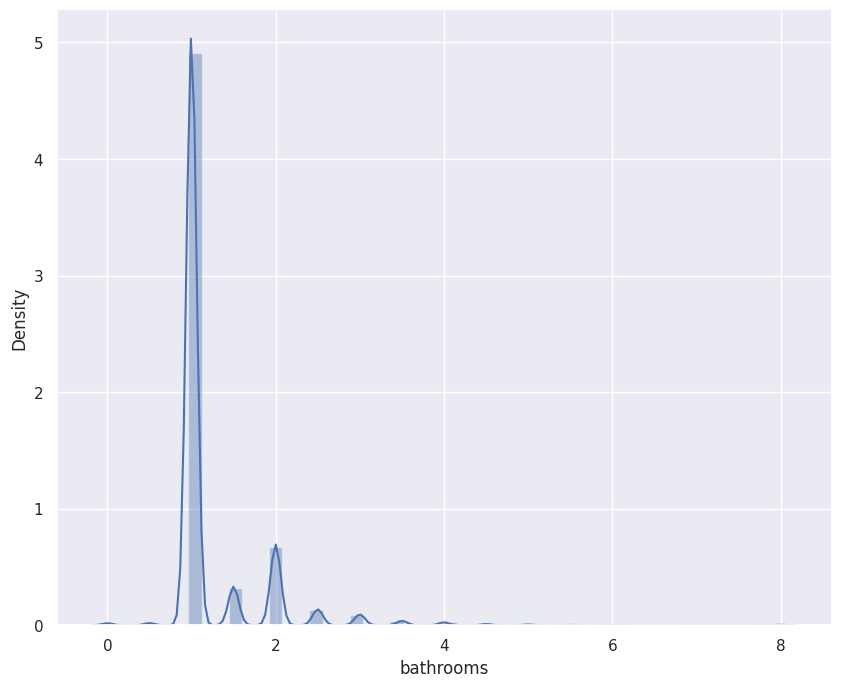

In [ ]:
sns.distplot(df["bathrooms"])

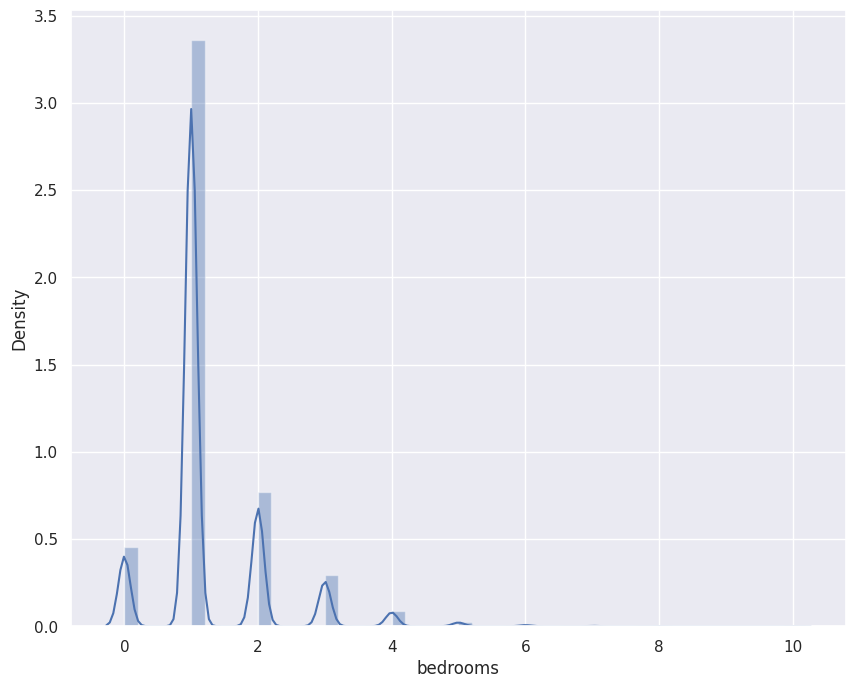

In [ ]:
df["review_scores_rating"] = df["review_scores_rating"].fillna(0)
sns.distplot(df["bedrooms"])
plt.show()

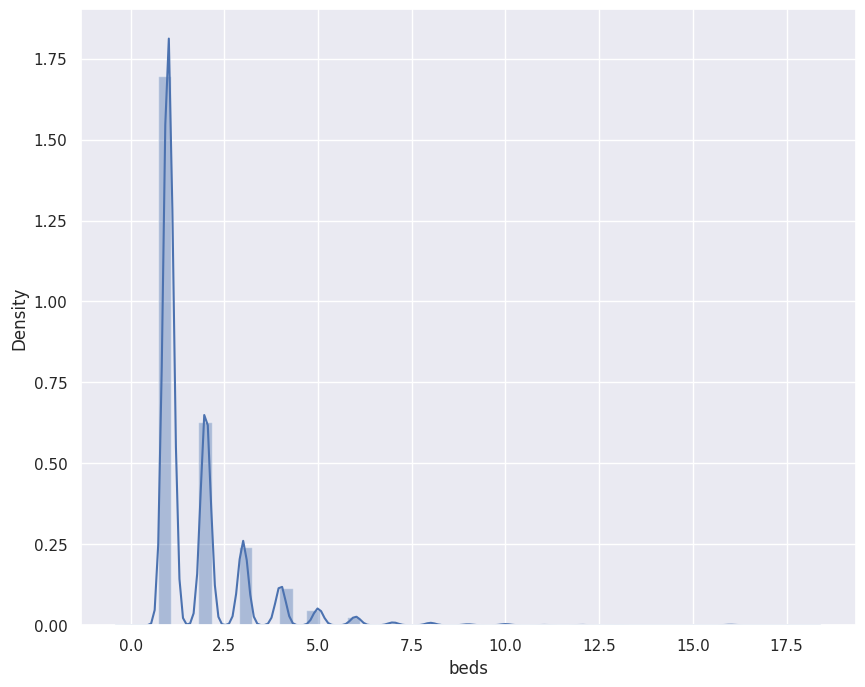

In [ ]:
df["bedrooms"] = df['bedrooms'].fillna((df["bathrooms"].median()))
sns.distplot(df["beds"])
plt.show()

In [ ]:
df["beds"] = df["beds"].fillna((df["bathrooms"].median()))

In [ ]:
amenities_count = []
for i in df["amenities"]:
    amenities_count.append(len(i))

df["amenities"] = amenities_count

In [ ]:
# Function to plot catplot graphs
def plot_catplot(h,v,he,a):
    sns.set(font_scale=1.5)
    sns.catplot(x=h,kind=v,data=df,height=he, aspect = a)

# Function to plot catplot graphs
def plot_piechart(h):
    sns.set(font_scale=1.5)
    fig = plt.figure(figsize=(5,5))
    ax = fig.add_axes([0,0,1,1])
    ax.axis('equal')
    langs = list(df[h].unique())
    students =list(df[h].value_counts())
    ax.pie(students, labels = langs,autopct='%1.2f%%')
    plt.show()

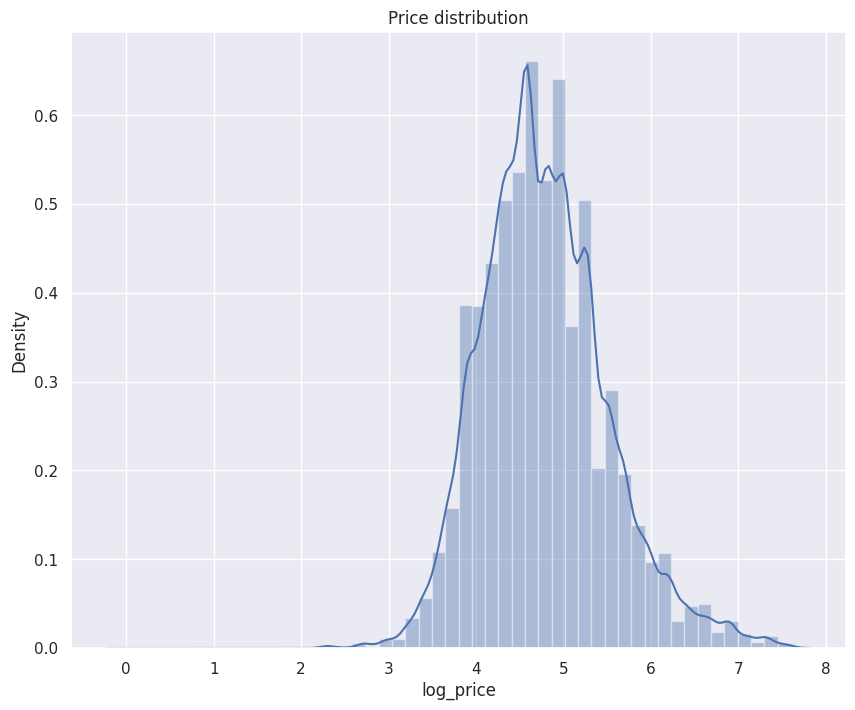

In [ ]:
plt.figure(figsize = (10, 8))
sns.distplot(df["log_price"])
plt.title('Price distribution')
plt.show()

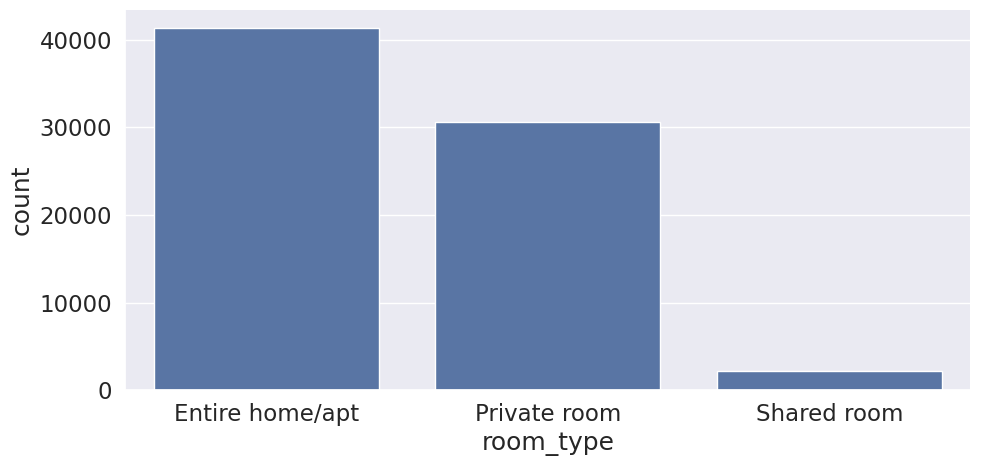

In [ ]:
plot_catplot("room_type", "count", 5, 2)

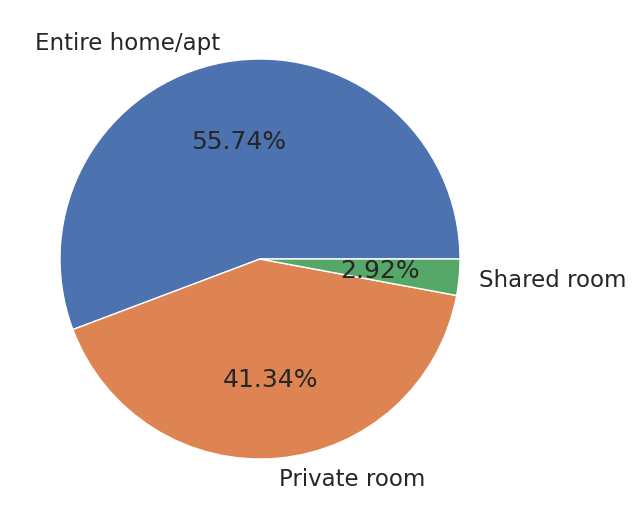

In [ ]:
plot_piechart("room_type")

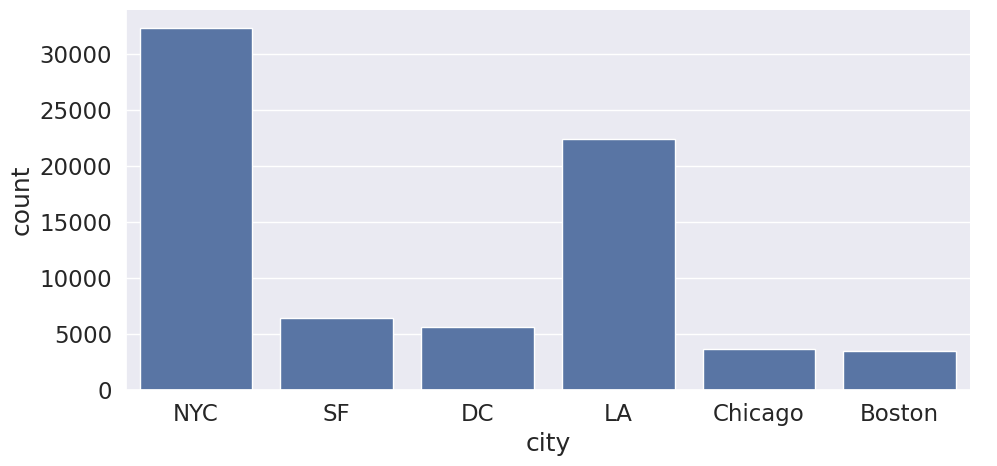

In [ ]:
plot_catplot("city","count", 5, 2)

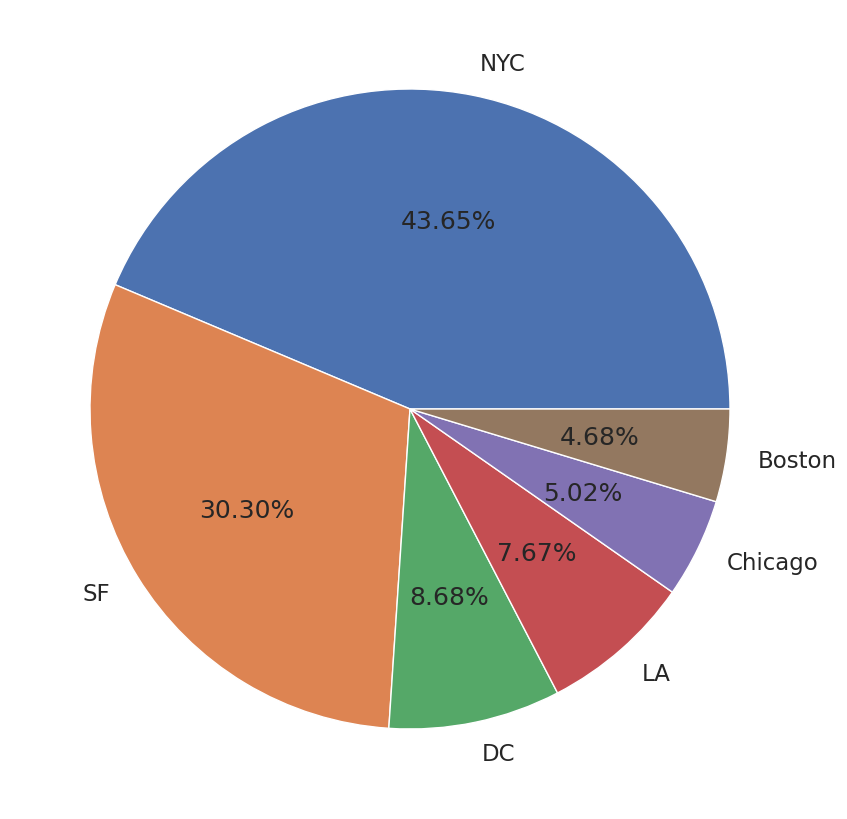

In [ ]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
langs = list(df.city.unique())
students =list(df.city.value_counts())
ax.pie(students, labels = langs,autopct='%1.2f%%')
plt.show()

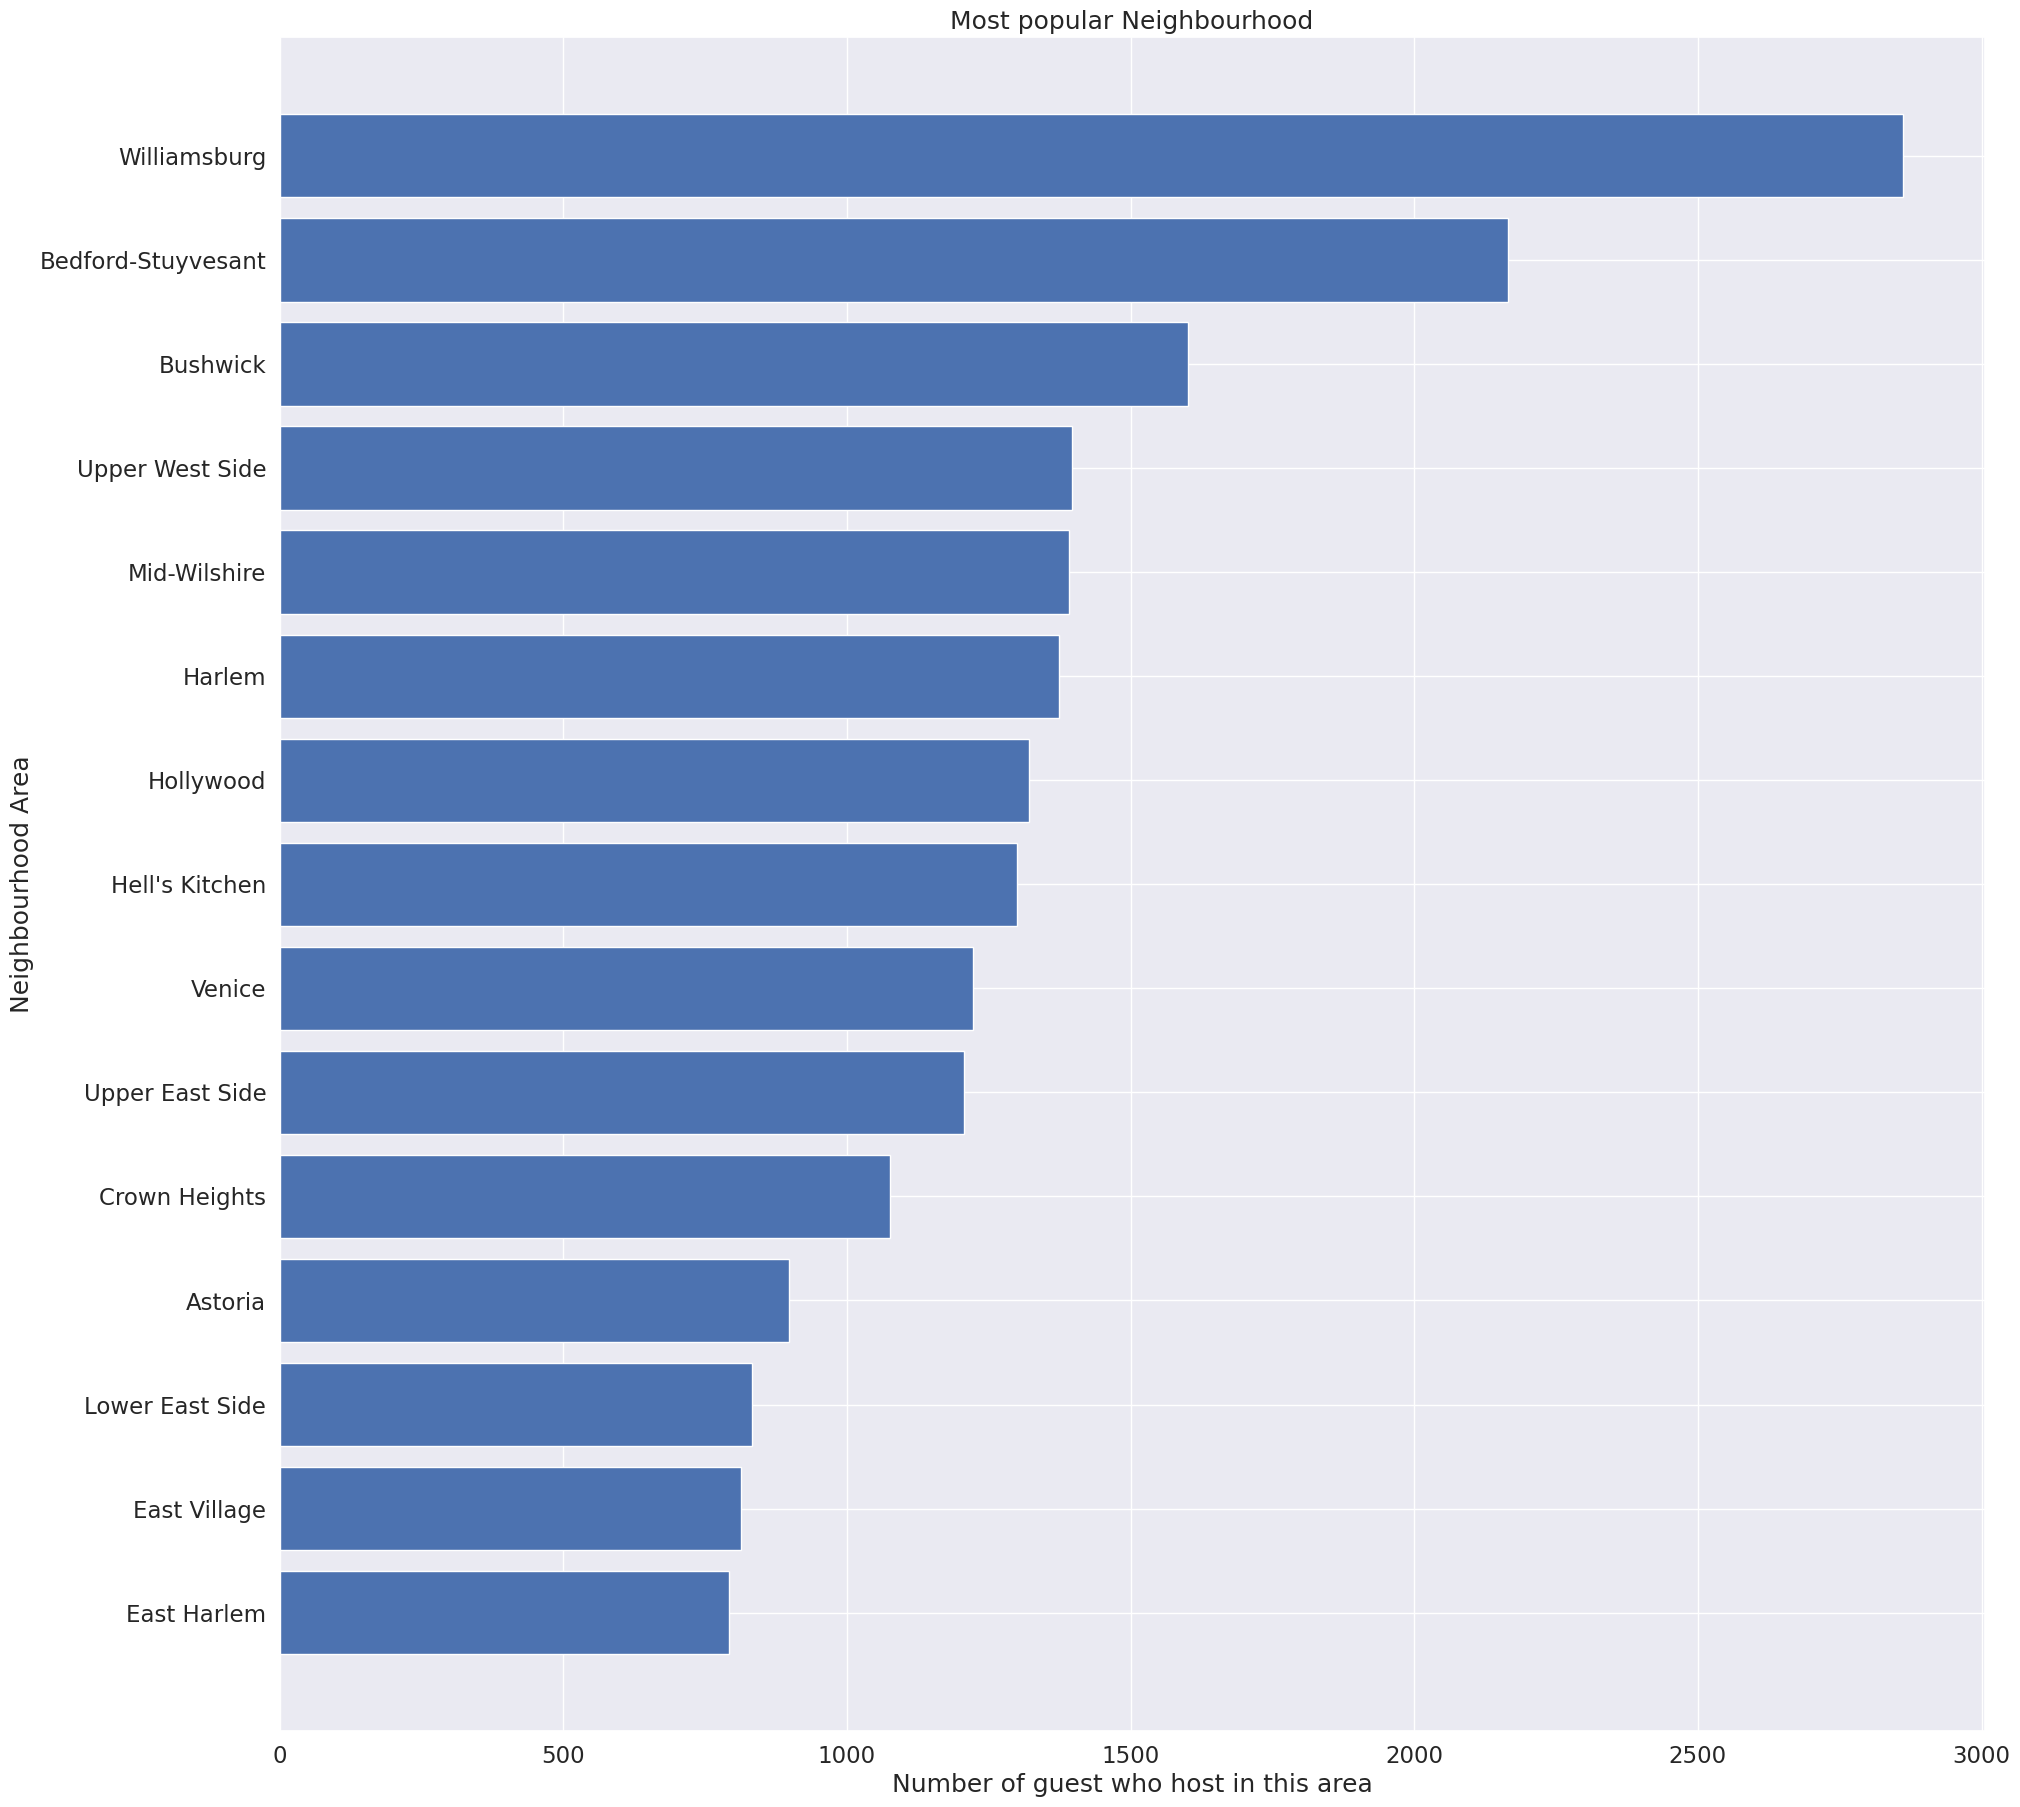

In [ ]:
data = df.neighbourhood.value_counts()[:15]
plt.figure(figsize=(22,22))
x = list(data.index)
y = list(data.values)
x.reverse()
y.reverse()

plt.title("Most popular Neighbourhood")
plt.ylabel("Neighbourhood Area")
plt.xlabel("Number of guest who host in this area")

plt.barh(x,y)
plt.show()

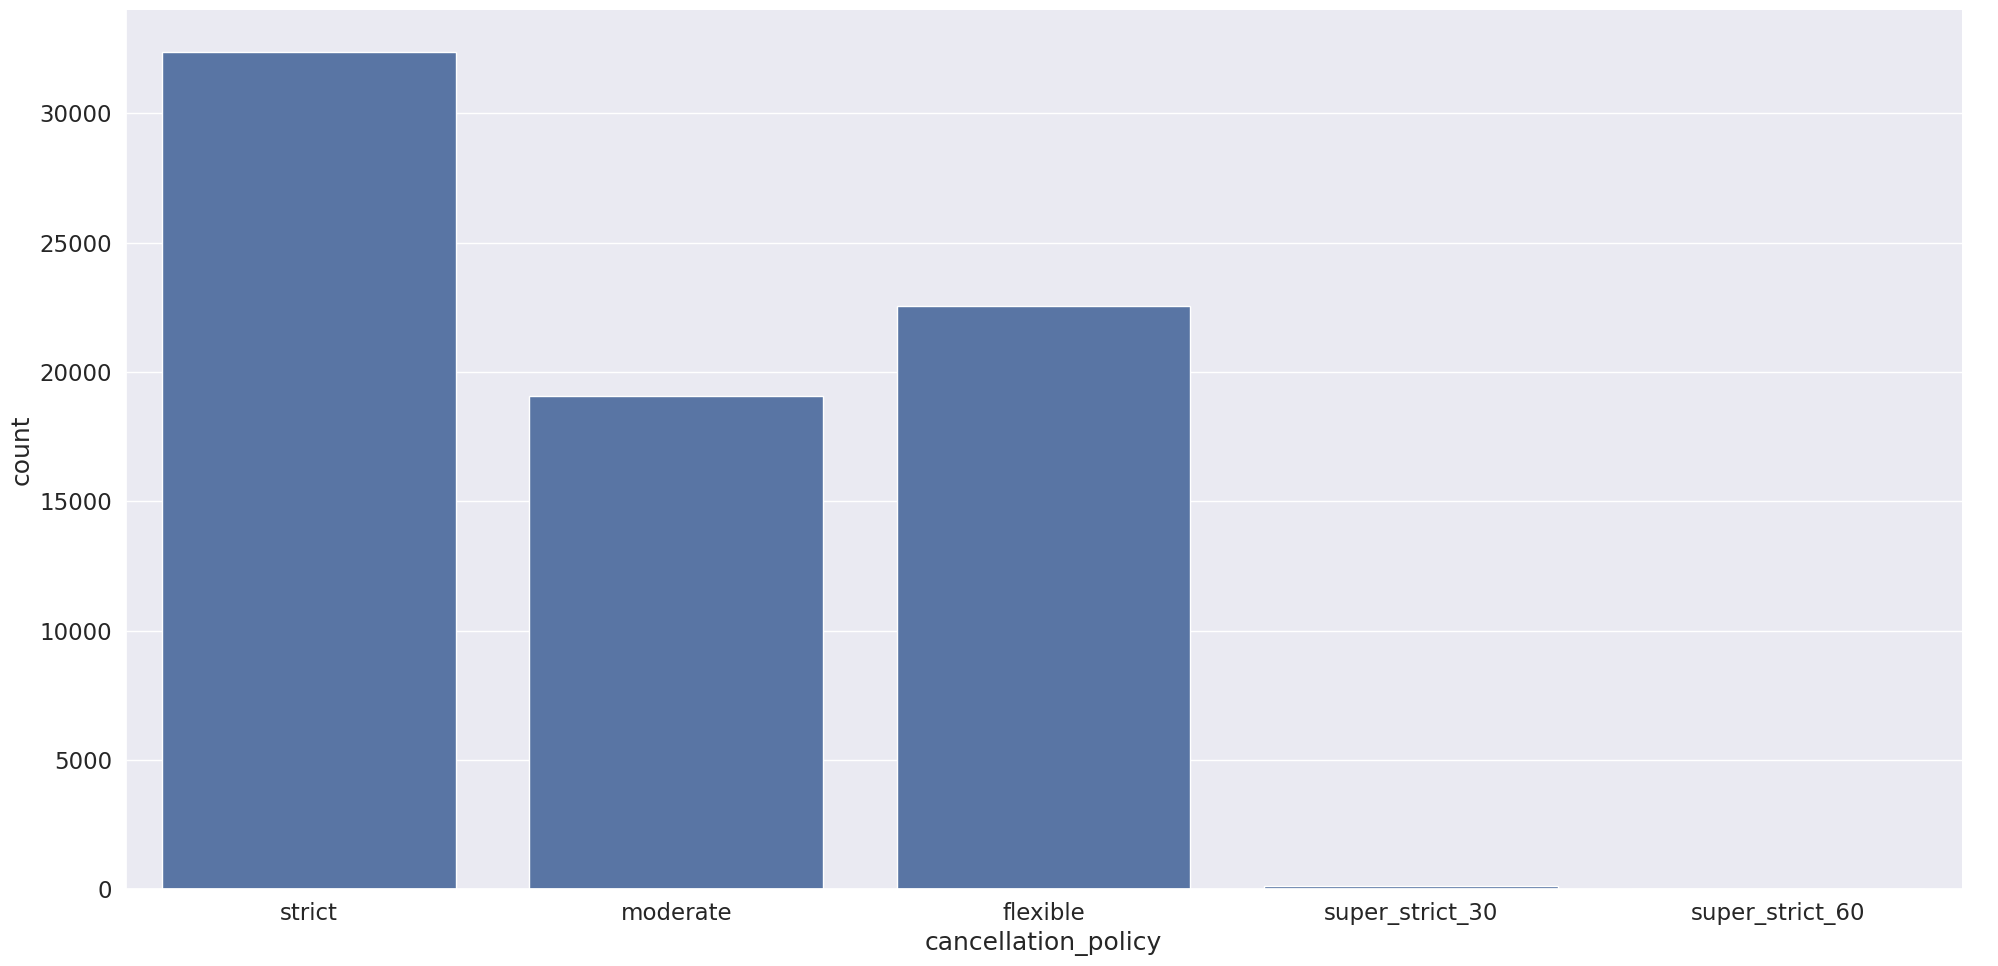

In [ ]:
plot_catplot("cancellation_policy","count",10, 2)

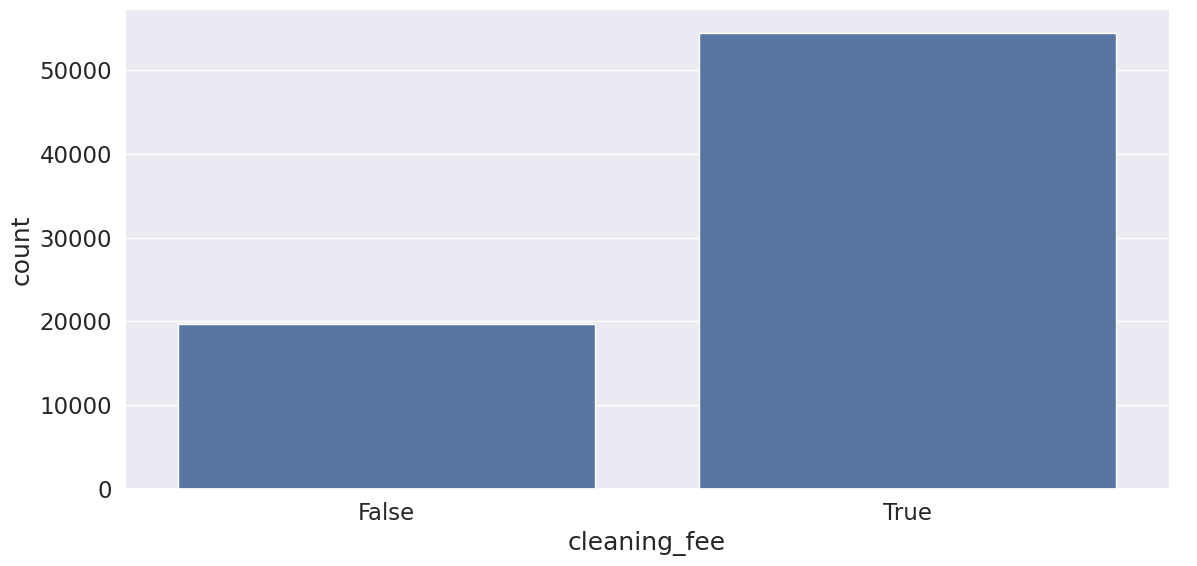

In [ ]:
plot_catplot("cleaning_fee","count",6,2)

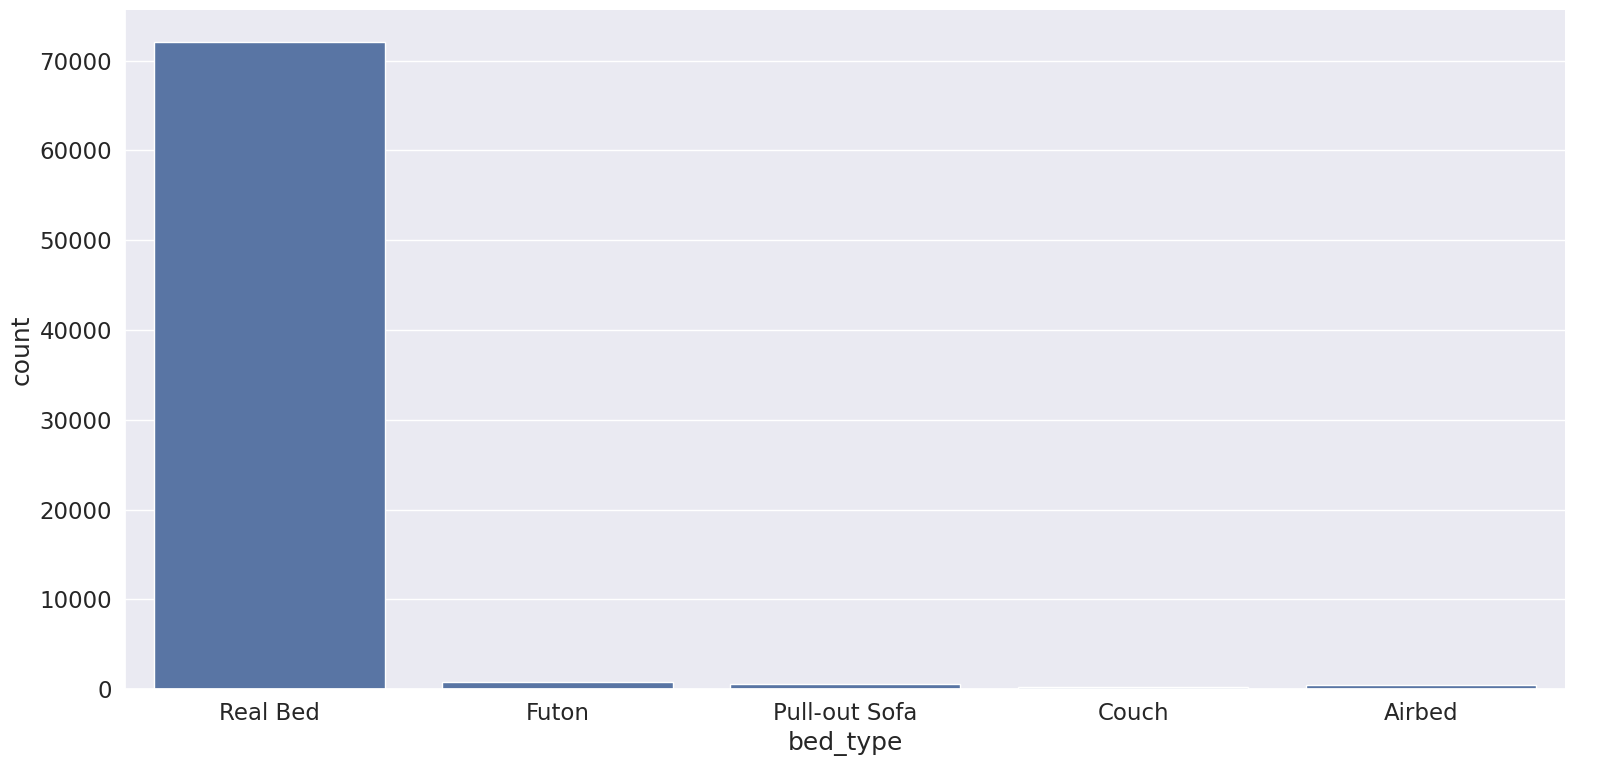

In [ ]:
plot_catplot("bed_type","count",8, 2)

In [ ]:
categorical_col = []
for column in df.columns:

    if df[column].dtypes != "float64" and df[column].dtypes != "int64":
        categorical_col.append(column)

categorical_col

['property_type',
 'room_type',
 'bed_type',
 'cancellation_policy',
 'cleaning_fee',
 'city',
 'description',
 'first_review',
 'host_has_profile_pic',
 'host_identity_verified',
 'host_response_rate',
 'host_since',
 'instant_bookable',
 'last_review',
 'name',
 'neighbourhood',
 'thumbnail_url',
 'zipcode']

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in categorical_col:
    df[col] = le.fit_transform(df[col])

In [ ]:
x = df.drop(["id","name","log_price","description","first_review","host_since","last_review","neighbourhood",
            "thumbnail_url", "zipcode"],axis = 1)
y = df.log_price

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=101)

In [ ]:
lr = LinearRegression()

lr.fit(x_train,y_train)

y_pred_lr = lr.predict(x_test)

mae_lr = metrics.mean_absolute_error(y_test, y_pred_lr)
mse_lr = metrics.mean_squared_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(metrics.mean_squared_error(y_test, y_pred_lr))
r2_lr = metrics.r2_score(y_test, y_pred_lr)


print('\nMean Absolute Error of Linear Regression     : ', mae_lr)
print('\nMean Squarred Error of Linear Regression     : ', mse_lr)
print('\nRoot Mean Squarred Error of Linear Regression: ', rmse_lr)
print('\nR2 Score of Linear Regression                : ', r2_lr)


Mean Absolute Error of Linear Regression     :  0.36870444242179246

Mean Squarred Error of Linear Regression     :  0.23465903965420432

Root Mean Squarred Error of Linear Regression:  0.48441618434379785

R2 Score of Linear Regression                :  0.5468814426508137


In [ ]:
rf = RandomForestRegressor()

rf.fit(x_train,y_train)

y_pred_rf = rf.predict(x_test)

mae_rf = metrics.mean_absolute_error(y_test, y_pred_rf)
mse_rf = metrics.mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(metrics.mean_squared_error(y_test, y_pred_rf))
r2_rf = metrics.r2_score(y_test, y_pred_rf)


print('\nMean Absolute Error of Random Forest Regressor     : ', mae_rf)
print('\nMean Squarred Error of Random Forest Regressor     : ', mse_rf)
print('\nRoot Mean Squarred Error of Random Forest Regressor: ', rmse_rf)
print('\nR2 Score of Random Forest Regressor                : ', r2_rf)


Mean Absolute Error of Random Forest Regressor     :  0.28310710026919234

Mean Squarred Error of Random Forest Regressor     :  0.15478326927009045

Root Mean Squarred Error of Random Forest Regressor:  0.39342504911366594

R2 Score of Random Forest Regressor                :  0.7011188157217133


In [ ]:
from sklearn.linear_model import Ridge
model = Pipeline([
    ('poly', PolynomialFeatures()),
    ('ridge', Ridge(fit_intercept=True))
])

param_grid = {
    'poly__degree': [1, 2, 3],
    'ridge__alpha': [0.1, 0.5, 1.0, 2.0]
}

# Perform grid search with 5-fold cross-validation

poly_tuned = GridSearchCV(model, param_grid, cv=5)

#Traning and Testing

poly_tuned.fit(x_train, y_train)

y_pred_poly = poly_tuned.predict(x_test)


mae_poly  = metrics.mean_absolute_error(y_test, y_pred_poly)
mse_poly  = metrics.mean_squared_error(y_test, y_pred_poly)
rmse_poly = np.sqrt(metrics.mean_squared_error(y_test, y_pred_poly))
r2_poly   = metrics.r2_score(y_test, y_pred_poly)


print('\nMean Absolute Error of Polynomial Regression     : ', mae_poly)
print('\nMean Squarred Error of Polynomial Regression     : ', mse_poly)
print('\nRoot Mean Squarred Error of Polynomial Regression: ', rmse_poly)
print('\nR2 Score of Polynomial Regression                : ', r2_poly)


Mean Absolute Error of Polynomial Regression     :  0.3423229566707661

Mean Squarred Error of Polynomial Regression     :  0.20385050510211455

Root Mean Squarred Error of Polynomial Regression:  0.4514980676615511

R2 Score of Polynomial Regression                :  0.6063716662145722


In [ ]:
model_CBR = CatBoostRegressor()

model_CBR.fit(x_train, y_train)

cross_val_score(model_CBR, x_train, y_train,
                           scoring='r2',
                           cv=KFold(n_splits=5,
                                    shuffle=True,
                                    random_state=2022,
                                    ))

y_pred_cbr = model_CBR.predict(x_test)

mae_cbr  = metrics.mean_absolute_error(y_test, y_pred_cbr)
mse_cbr  = metrics.mean_squared_error(y_test, y_pred_cbr)
rmse_cbr = np.sqrt(metrics.mean_squared_error(y_test, y_pred_cbr))
r2_cbr   = metrics.r2_score(y_test, y_pred_cbr)


print('\nMean Absolute Error of CatBoost Regressor     : ', mae_cbr)
print('\nMean Squarred Error of CatBoost Regressor     : ', mse_cbr)
print('\nRoot Mean Squarred Error of CatBoost Regressor: ', rmse_cbr)
print('\nR2 Score of CatBoost Regressor                : ', r2_cbr)

Streaming output truncated to the last 5000 lines.
12:	learn: 0.5164944	total: 127ms	remaining: 9.65s
13:	learn: 0.5096229	total: 139ms	remaining: 9.79s
14:	learn: 0.5029145	total: 152ms	remaining: 9.98s
15:	learn: 0.4977718	total: 177ms	remaining: 10.9s
16:	learn: 0.4920552	total: 187ms	remaining: 10.8s
17:	learn: 0.4878647	total: 196ms	remaining: 10.7s
18:	learn: 0.4830237	total: 206ms	remaining: 10.6s
19:	learn: 0.4795520	total: 215ms	remaining: 10.6s
20:	learn: 0.4752232	total: 225ms	remaining: 10.5s
21:	learn: 0.4716216	total: 239ms	remaining: 10.6s
22:	learn: 0.4690338	total: 248ms	remaining: 10.6s
23:	learn: 0.4655773	total: 258ms	remaining: 10.5s
24:	learn: 0.4628972	total: 267ms	remaining: 10.4s
25:	learn: 0.4607830	total: 277ms	remaining: 10.4s
26:	learn: 0.4583931	total: 286ms	remaining: 10.3s
27:	learn: 0.4557767	total: 295ms	remaining: 10.3s
28:	learn: 0.4540356	total: 304ms	remaining: 10.2s
29:	learn: 0.4515291	total: 313ms	remaining: 10.1s
30:	learn: 0.4503433	total: 321

In [ ]:
gb = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3)

gb.fit(x_train, y_train)

y_pred_gb = gb.predict(x_test)

mae_gb  = metrics.mean_absolute_error(y_test, y_pred_gb)
mse_gb  = metrics.mean_squared_error(y_test, y_pred_gb)
rmse_gb = np.sqrt(metrics.mean_squared_error(y_test, y_pred_gb))
r2_gb   = metrics.r2_score(y_test, y_pred_gb)


print('\nMean Absolute Error of Gradient Boosting     : ', mae_gb)
print('\nMean Squarred Error of Gradient Boosting     : ', mse_gb)
print('\nRoot Mean Squarred Error of Gradient Boosting: ', rmse_gb)
print('\nR2 Score of Gradient Boosting                : ', r2_gb)


Mean Absolute Error of Gradient Boosting     :  0.3052618399619076

Mean Squarred Error of Gradient Boosting     :  0.17018747706259146

Root Mean Squarred Error of Gradient Boosting:  0.41253784924851616

R2 Score of Gradient Boosting                :  0.6713738188005172


In [ ]:
xgb = XGBRegressor(objective='reg:squarederror')

xgb.fit(x_train, y_train)

y_pred_xgb = xgb.predict(x_test)

mae_xgb  = metrics.mean_absolute_error(y_test, y_pred_xgb)
mse_xgb  = metrics.mean_squared_error(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(metrics.mean_squared_error(y_test, y_pred_xgb))
r2_xgb   = metrics.r2_score(y_test, y_pred_xgb)


print('\nMean Absolute Error of XGBoost Regressor     : ', mae_xgb)
print('\nMean Squarred Error of XGBoost Regressor     : ', mse_xgb)
print('\nRoot Mean Squarred Error of XGBoost Regressor: ', rmse_xgb)
print('\nR2 Score of XGBoost Regressor                : ', r2_xgb)


Mean Absolute Error of XGBoost Regressor     :  0.2823860452633754

Mean Squarred Error of XGBoost Regressor     :  0.14978968794775047

Root Mean Squarred Error of XGBoost Regressor:  0.38702672769170665

R2 Score of XGBoost Regressor                :  0.7107612499876971


In [ ]:
from statsmodels.tsa.arima.model import ARIMA

# Assuming your time series data is in 'y_train' and 'y_test'

# Define ARIMA model parameters
p = 5  # AR (Auto-Regressive) order
d = 1  # differencing order
q = 0  # MA (Moving Average) order

# Fit ARIMA model
arima_model = ARIMA(y_train, order=(p, d, q))
arima_fit = arima_model.fit()

# Forecast
y_pred_arima = arima_fit.forecast(steps=len(y_test))

# Evaluate ARIMA
mae_arima = metrics.mean_absolute_error(y_test, y_pred_arima)
mse_arima = metrics.mean_squared_error(y_test, y_pred_arima)
rmse_arima = np.sqrt(metrics.mean_squared_error(y_test, y_pred_arima))
r2_arima = metrics.r2_score(y_test, y_pred_arima)

print('\nMean Absolute Error of ARIMA: ', mae_arima)
print('\nMean Squared Error of ARIMA: ', mse_arima)
print('\nRoot Mean Squared Error of ARIMA: ', rmse_arima)
print('\nR2 Score of ARIMA: ', r2_arima)


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(



Mean Absolute Error of ARIMA:  0.5650235980883487

Mean Squared Error of ARIMA:  0.5414351806289424

Root Mean Squared Error of ARIMA:  0.7358227915938337

R2 Score of ARIMA:  -0.045492763910605305


In [ ]:
r2_list = {"Linear Regression": r2_lr,
          "Random Forest": r2_rf ,
          "Polynomial Regression": r2_poly,
          "CatBoost": r2_cbr,
          "Gradient Boosting":r2_gb ,
          "XGBoost": r2_xgb,
           "ARIMA": r2_arima}

mae_list = {"Linear Regression": mae_lr,
          "Random Forest": mae_rf ,
          "Polynomial Regression": mae_poly,
          "CatBoost": mae_cbr,
          "Gradient Boosting":mae_gb ,
          "XGBoost": mae_xgb,
          "ARIMA": mae_arima}

mse_list = {"Linear Regression": mse_lr,
          "Random Forest": mse_rf ,
          "Polynomial Regression": mse_poly,
          "CatBoost": mse_cbr,
          "Gradient Boosting":mse_gb ,
          "XGBoost": mse_xgb,
          "ARIMA": mse_arima}

rmse_list = {"Linear Regression": rmse_lr,
          "Random Forest": rmse_rf ,
          "Polynomial Regression": rmse_poly,
          "CatBoost": rmse_cbr,
          "Gradient Boosting":rmse_gb ,
          "XGBoost": rmse_xgb,
          "ARIMA": rmse_arima}

In [ ]:
a1 =  pd.DataFrame.from_dict(r2_list, orient = 'index', columns = ["R2 SCORE"])
a2 =  pd.DataFrame.from_dict(mae_list, orient = 'index', columns = ["MEAN ABSOLUTE ERROR"])
a3 =  pd.DataFrame.from_dict(mse_list, orient = 'index', columns = ["MEAN SQUARRED ERROR"])
a4 =  pd.DataFrame.from_dict(rmse_list, orient = 'index', columns = ["ROOT MEAN SQUARRED ERROR"])

In [ ]:
org = pd.concat([a1, a2, a3, a4], axis = 1)
org

R2 SCORE  MEAN ABSOLUTE ERROR  MEAN SQUARRED ERROR  \
Linear Regression      0.546881             0.368704             0.234659   
Random Forest          0.699299             0.283608             0.155726   
Polynomial Regression  0.606372             0.342323             0.203851   
CatBoost               0.720348             0.276937             0.144825   
Gradient Boosting      0.671374             0.305262             0.170187   
XGBoost                0.710761             0.282386             0.149790   
ARIMA                 -0.045493             0.565024             0.541435   

                       ROOT MEAN SQUARRED ERROR  
Linear Regression                      0.484416  
Random Forest                          0.394621  
Polynomial Regression                  0.451498  
CatBoost                               0.380559  
Gradient Boosting                      0.412538  
XGBoost                                0.387027  
ARIMA                                  0.735823

from matplotlib import pyplot as plt
org['R2 SCORE'].plot(kind='hist', bins=20, title='R2 SCORE')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
org['MEAN ABSOLUTE ERROR'].plot(kind='hist', bins=20, title='MEAN ABSOLUTE ERROR')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
org['MEAN SQUARRED ERROR'].plot(kind='hist', bins=20, title='MEAN SQUARRED ERROR')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
org['ROOT MEAN SQUARRED ERROR'].plot(kind='hist', bins=20, title='ROOT MEAN SQUARRED ERROR')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
org.plot(kind='scatter', x='R2 SCORE', y='MEAN ABSOLUTE ERROR', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
org.plot(kind='scatter', x='MEAN ABSOLUTE ERROR', y='MEAN SQUARRED ERROR', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
org.plot(kind='scatter', x='MEAN SQUARRED ERROR', y='ROOT MEAN SQUARRED ERROR', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
org['R2 SCORE'].plot(kind='line', figsize=(8, 4), title='R2 SCORE')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
org['MEAN ABSOLUTE ERROR'].plot(kind='line', figsize=(8, 4), title='MEAN ABSOLUTE ERROR')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
org['MEAN SQUARRED ERROR'].plot(kind='line', figsize=(8, 4), title='MEAN SQUARRED ERROR')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
org['ROOT MEAN SQUARRED ERROR'].plot(kind='line', figsize=(8, 4), title='ROOT MEAN SQUARRED ERROR')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_0['R2 SCORE'].plot(kind='hist', bins=20, title='R2 SCORE')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['MEAN ABSOLUTE ERROR'].plot(kind='hist', bins=20, title='MEAN ABSOLUTE ERROR')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['MEAN SQUARRED ERROR'].plot(kind='hist', bins=20, title='MEAN SQUARRED ERROR')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['ROOT MEAN SQUARRED ERROR'].plot(kind='hist', bins=20, title='ROOT MEAN SQUARRED ERROR')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_4.groupby('index').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='R2 SCORE', y='MEAN ABSOLUTE ERROR', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='MEAN ABSOLUTE ERROR', y='MEAN SQUARRED ERROR', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='MEAN SQUARRED ERROR', y='ROOT MEAN SQUARRED ERROR', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_8['R2 SCORE'].plot(kind='line', figsize=(8, 4), title='R2 SCORE')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_9['MEAN ABSOLUTE ERROR'].plot(kind='line', figsize=(8, 4), title='MEAN ABSOLUTE ERROR')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_10['MEAN SQUARRED ERROR'].plot(kind='line', figsize=(8, 4), title='MEAN SQUARRED ERROR')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_11['ROOT MEAN SQUARRED ERROR'].plot(kind='line', figsize=(8, 4), title='ROOT MEAN SQUARRED ERROR')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_12['index'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_12, x='R2 SCORE', y='index', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_13['index'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_13, x='MEAN ABSOLUTE ERROR', y='index', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_14['index'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_14, x='MEAN SQUARRED ERROR', y='index', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_15['index'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_15, x='ROOT MEAN SQUARRED ERROR', y='index', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

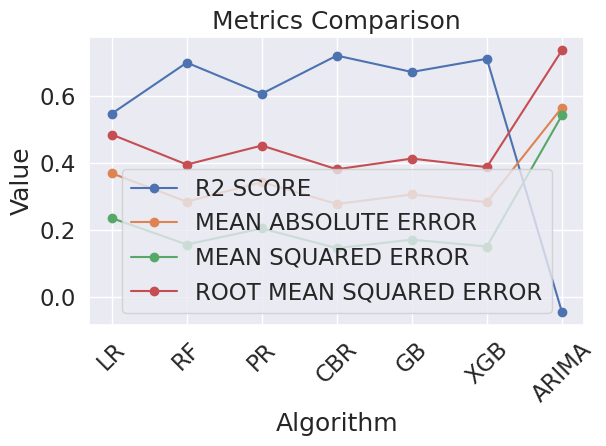

In [ ]:
alg = ['LR', 'RF', 'PR', 'CBR', 'GB', 'XGB', 'ARIMA']  # Add 'ARIMA' to the list of algorithms

plt.plot(alg, a1.values.flatten(), marker='o')
plt.plot(alg, a2.values.flatten(), marker='o')
plt.plot(alg, a3.values.flatten(), marker='o')
plt.plot(alg, a4.values.flatten(), marker='o')

plt.title("Metrics Comparison")
plt.xlabel("Algorithm")
plt.ylabel("Value")
plt.xticks(rotation=45)
plt.legend(["R2 SCORE", "MEAN ABSOLUTE ERROR", "MEAN SQUARED ERROR", "ROOT MEAN SQUARED ERROR"])
plt.tight_layout()
plt.show()